In [998]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif ,f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std , mean
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
# Set the environment variable to limit the number of threads
os.environ['OMP_NUM_THREADS'] = '2'


-    AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
-    AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
-    AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
-    AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
-    AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
-    Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
-    Complain - 1 if customer complained in the last 2 years
-    DtCustomer - date of customer’s enrolment with the company
-    Education - customer’s level of education
-    Marital - customer’s marital status
-    Kidhome - number of small children in customer’s household
-    Teenhome - number of teenagers in customer’s household
-    Income - customer’s yearly household income
-    MntFishProducts - amount spent on fish products in the last 2 years
-    MntMeatProducts - amount spent on meat products in the last 2 years
-    MntFruits - amount spent on fruits products in the last 2 years
-    MntSweetProducts - amount spent on sweet products in the last 2 years
-    MntWines - amount spent on wine products in the last 2 years
-    MntGoldProds - amount spent on gold products in the last 2 years
-    NumDealsPurchases - number of purchases made with discount
-    NumCatalogPurchases - number of purchases made using catalogue
-    NumStorePurchases - number of purchases made directly in stores
-    NumWebPurchases - number of purchases made through company’s web site
-    NumWebVisitsMonth - number of visits to company’s web site in the last month
-    Recency - number of days since the last purchase

# inspecting our data

In [887]:
data  = pd.read_csv('F:\Desktop\self_study\dataSets\marketing_campaign.csv')

In [888]:
data.shape

(2240, 29)

In [889]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [890]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15/10/2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [891]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [892]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Pre-paration

### handling missing values

In [893]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### visaulizing the distrbution of the missing values

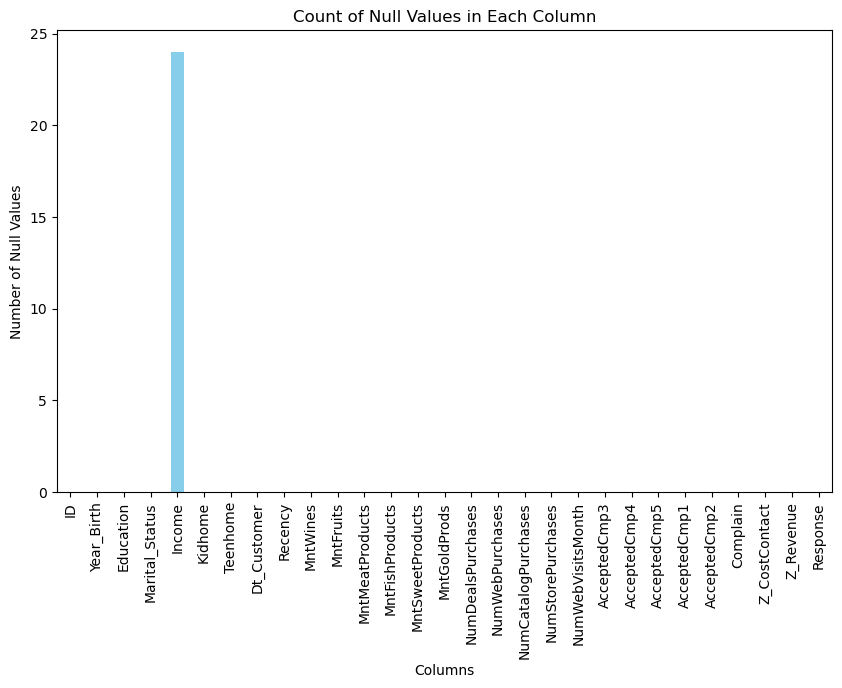

In [894]:
missing_values = data.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Count of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

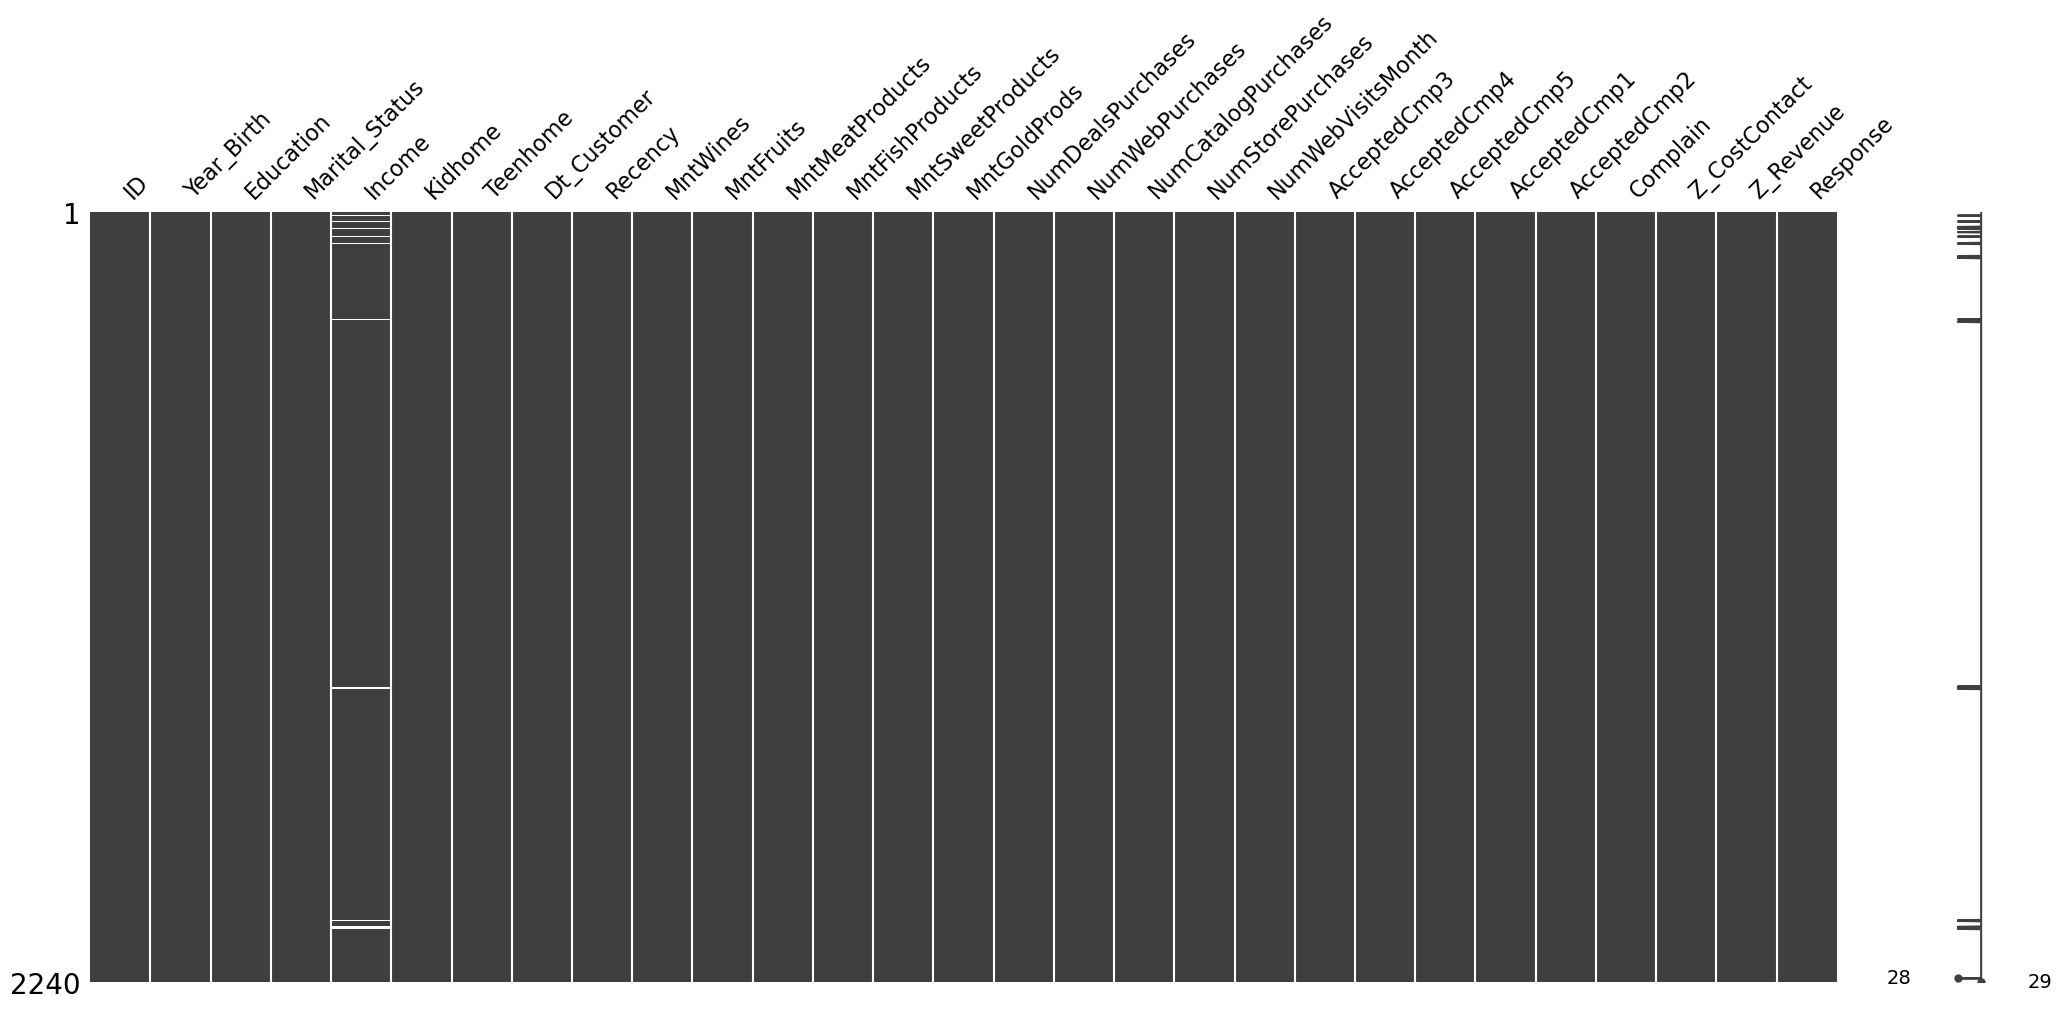

In [895]:
import missingno as msno
# Matrix plot
msno.matrix(data)
plt.show()

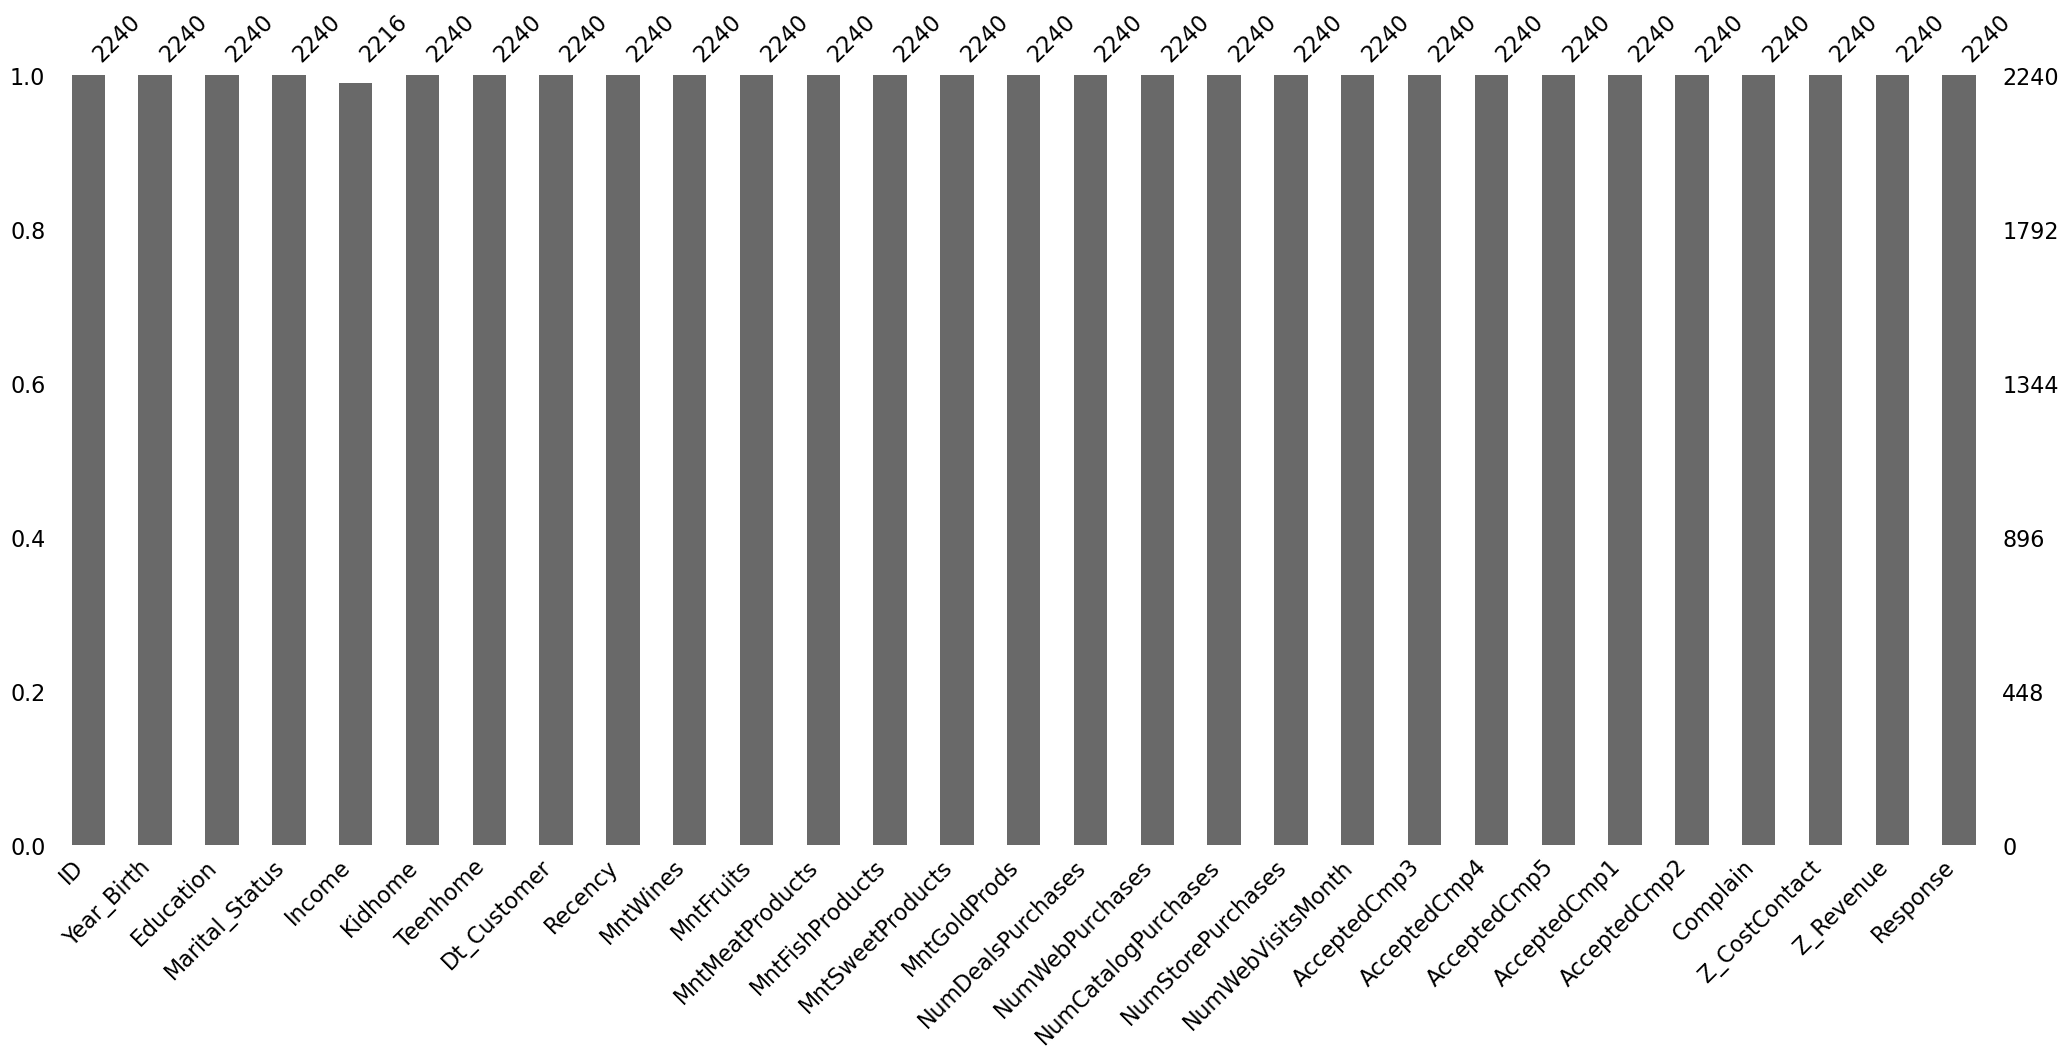

In [896]:
# Bar plot
msno.bar(data)
plt.show()

"Given that missing data exists only in one column and constitutes only a small proportion (24 out of 2240) of the total data, we have decided to drop these missing values without significantly affecting the overall integrity of the data."

In [897]:
data.dropna(inplace=True)

In [898]:
data.isnull().sum().sum()

0

### Outlier Identification and Removal

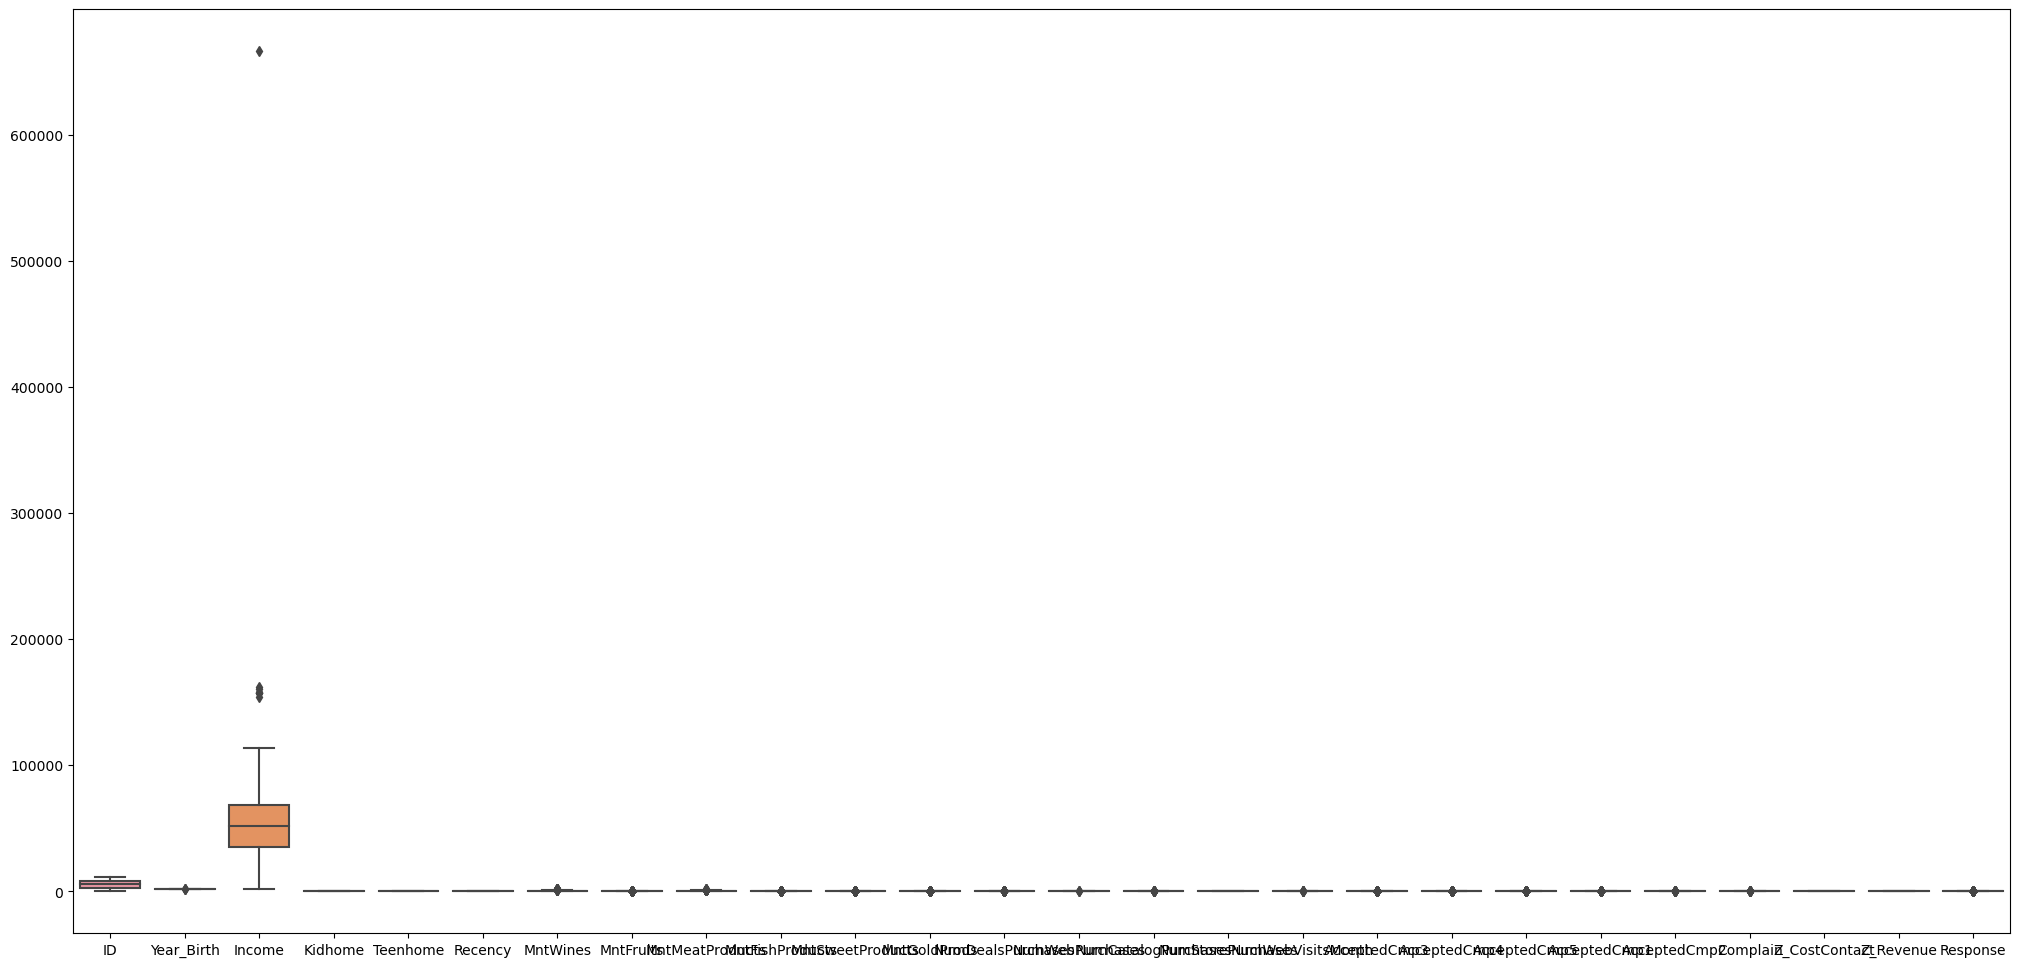

In [899]:
# Set the figure size
plt.figure(figsize=(25, 12))
sns.boxplot(data=data)
# Show the plot
plt.show()

<AxesSubplot:xlabel='Income'>

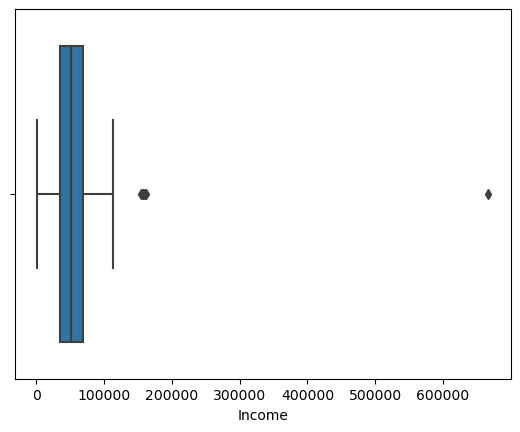

In [900]:
sns.boxplot(x = data["Income"])

In [901]:
# calculate summary satistics 
data_mean , data_std = mean(data['Income']) , std(data['Income'])
# define outliers
cut_off = data_std * 3
lower , upper  = data_mean - cut_off , data_mean+cut_off

#identify outliers
outliers =[ x for x in data['Income'] if x < lower or x > upper]
print('outlier observations: %d' % len(outliers))
outliers_removed = [x for x in data['Income'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


outlier observations: 8
Non-outlier observations: 2208


In [902]:
data = data[~((data['Income'] < lower) | (data['Income'] > upper))]

In [903]:
data.shape

(2208, 29)

<AxesSubplot:xlabel='Income'>

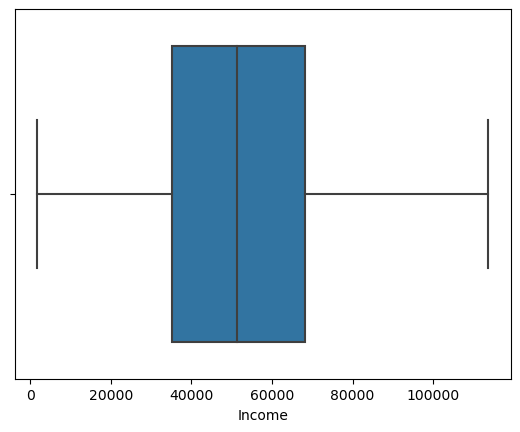

In [904]:
sns.boxplot(x = data['Income'])

# feature engineering

### create new coloumns

numeric features

In [905]:
data['foodSpending'] = data['MntFishProducts'] + data['MntFruits'] + \
                       data['MntGoldProds'] + data['MntMeatProducts'] + \
                       data['MntSweetProducts'] + data['MntWines']

In [906]:
data['TotalPurshuses'] = data['NumCatalogPurchases'] + data['NumDealsPurchases'] \
                       + data['NumStorePurchases'] + data['NumWebVisitsMonth']

In [907]:
data['TotalAcceptedCamps'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] +data['AcceptedCmp3'] \
                           + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [908]:
data['Age'] = 2024 - data['Year_Birth']

categorical feature

In [909]:
educationCounts = data[['Education']].groupby(data['Education']).count()
educationCounts.columns = ['counts']
educationCounts

,counts
Education,
2n Cycle,200
Basic,54
Graduation,1113
Master,364
PhD,477


In [910]:
def reAssignEdu(data):
    def assign_education_level(education):
        if education in ['Graduation', 'Master', 'PhD']:
            return 'High Education'
        elif education == 'Basic':
            return 'Medium Education'
        else:
            return 'Low Education'
    
    # Apply the helper function to the 'Education' column
    data['Education Level'] = data['Education'].apply(assign_education_level)
    return data

In [911]:
data = reAssignEdu(data)

In [912]:
educationLevel = data[['Education Level']].groupby(data['Education Level']).count()
educationLevel.columns = ['counts']
educationLevel

,counts
Education Level,
High Education,1954
Low Education,200
Medium Education,54


In [913]:
data[['Marital_Status','Kidhome','Teenhome']].head()

,Marital_Status,Kidhome,Teenhome
0,Single,0,0
1,Single,1,1
2,Together,0,0
3,Together,1,0
4,Married,1,0


In [914]:
data['Is_Parent'] = (data['Kidhome'] + data['Teenhome'] > 0).astype(int)

In [915]:
data[['Marital_Status']].value_counts()

Marital_Status
Married           854
Together          569
Single            471
Divorced          231
Widow              76
Alone               3
Absurd              2
YOLO                2
dtype: int64

In [916]:
data[['Marital_Status' , 'Kidhome','Teenhome']].groupby(['Marital_Status' ]).sum()

,Kidhome,Teenhome
Marital_Status,,
Absurd,0,0
Alone,3,2
Divorced,96,137
Married,389,437
Single,215,189
Together,255,302
Widow,18,49
YOLO,0,2


In [917]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'foodSpending', 'TotalPurshuses', 'TotalAcceptedCamps', 'Age',
       'Education Level', 'Is_Parent'],
      dtype='object')

In [918]:
data.drop(['ID' ,'Year_Birth','Z_CostContact', 'Z_Revenue','Dt_Customer','Recency'],axis=1,inplace=True)

# Exploratory data analysis (EDA)

### Distribution of numeric features

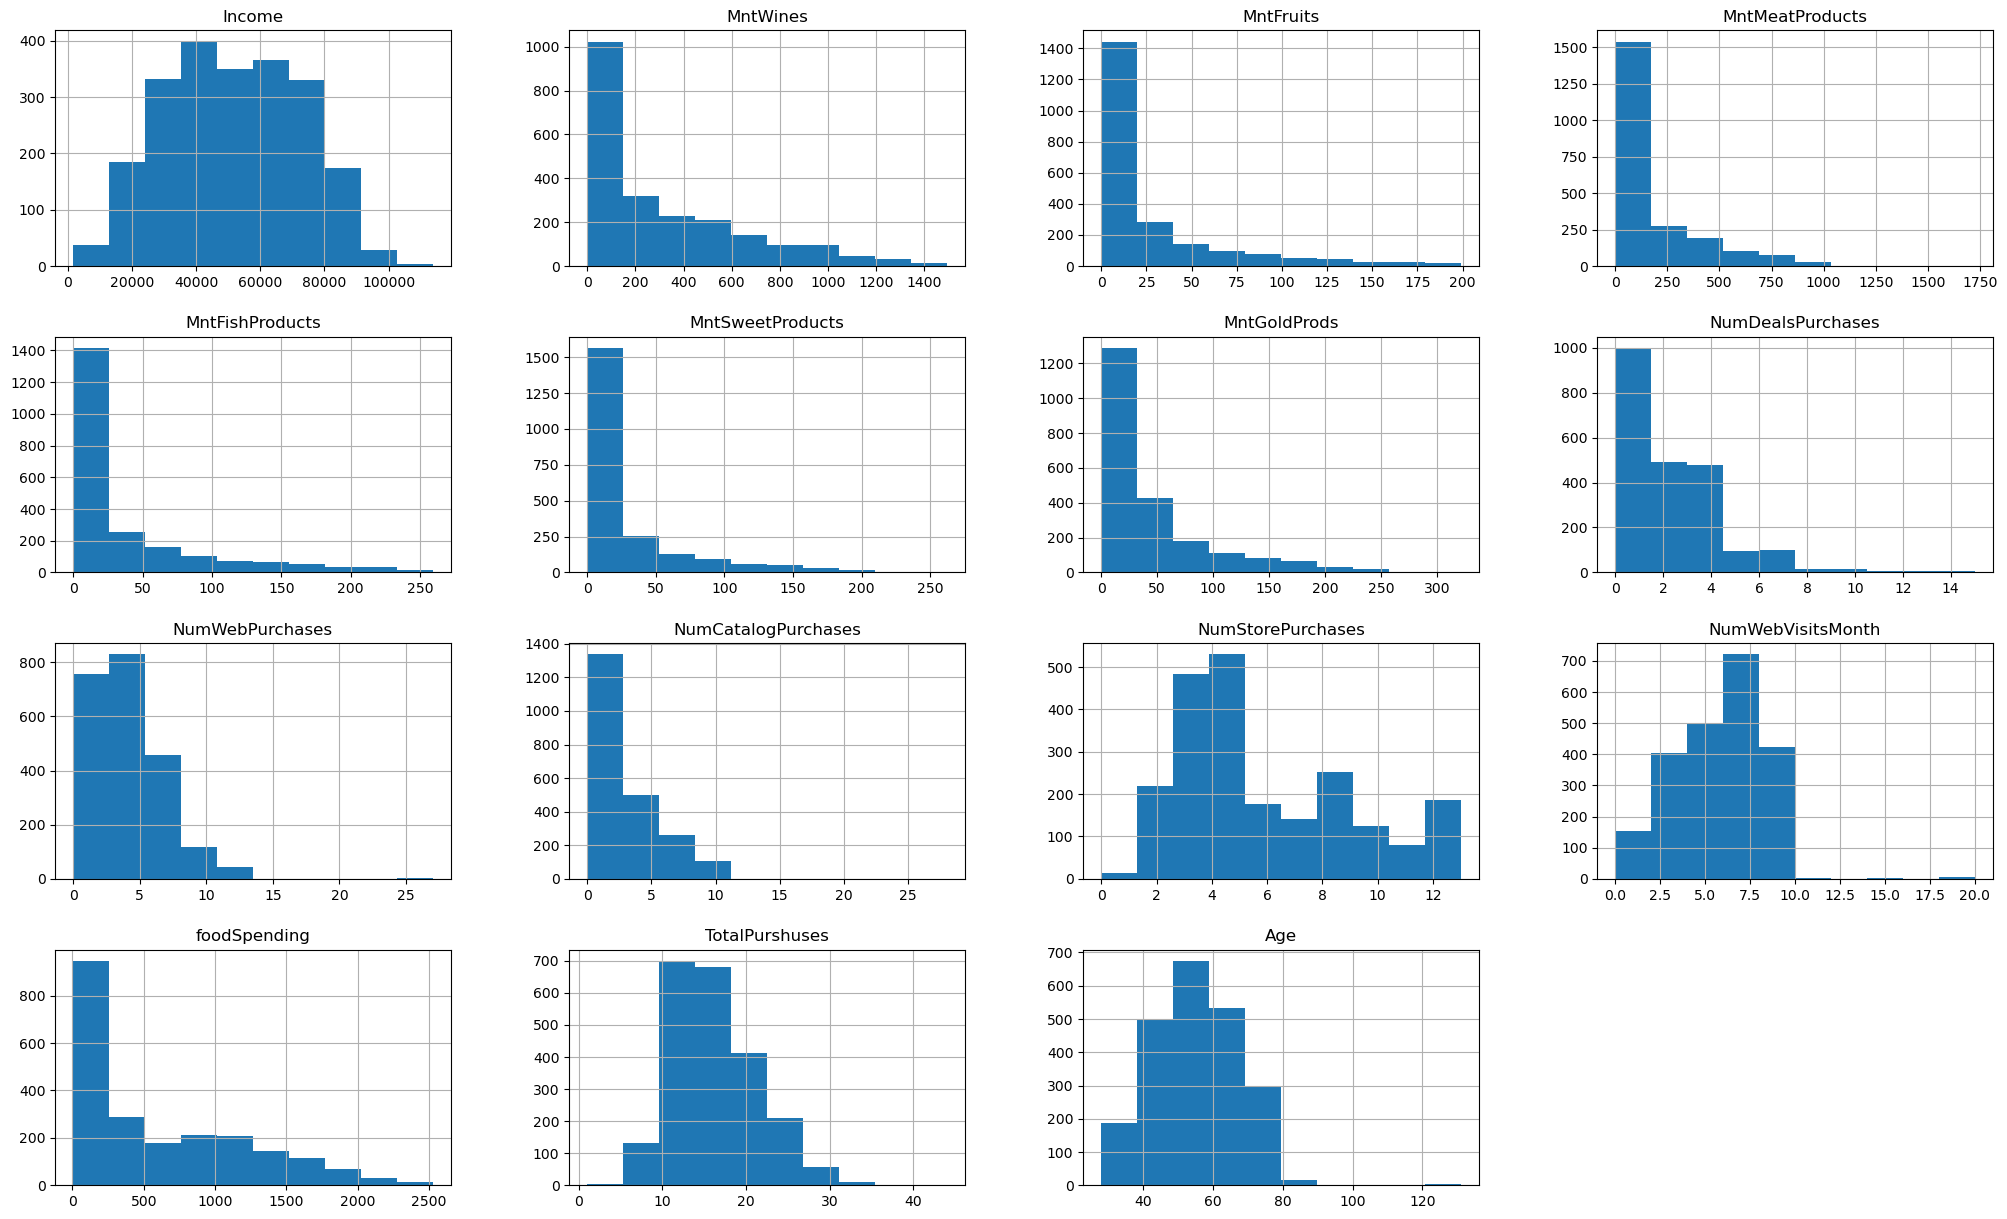

In [919]:
numericData =data[['Income',
                     'MntWines', 'MntFruits',
                     'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts','MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases',
                     'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth','foodSpending',
                     'TotalPurshuses','Age']]
numericData.hist(figsize=(25,15));

- insight:
   

 Some features exhibit skewness, indicating the need for scaling to normalize the data distribution.

### Distribution of numric features

In [920]:
data.describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,foodSpending,TotalPurshuses,TotalAcceptedCamps,Age,Is_Parent
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,51633.638134,0.442029,0.506341,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,2.316576,...,0.073370,0.064312,0.013587,0.009511,0.150815,606.875906,16.115036,0.299366,55.192935,0.715127
std,20713.376530,0.537063,0.544325,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,1.885450,...,0.260801,0.245363,0.115795,0.097081,0.357950,602.090272,5.226834,0.680201,11.991913,0.451456
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,28.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,12.000000,0.000000,47.000000,0.000000
50%,51301.000000,0.000000,0.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,397.000000,15.000000,0.000000,54.000000,1.000000
75%,68289.750000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1047.250000,20.000000,0.000000,65.000000,1.000000
max,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,44.000000,4.000000,131.000000,1.000000


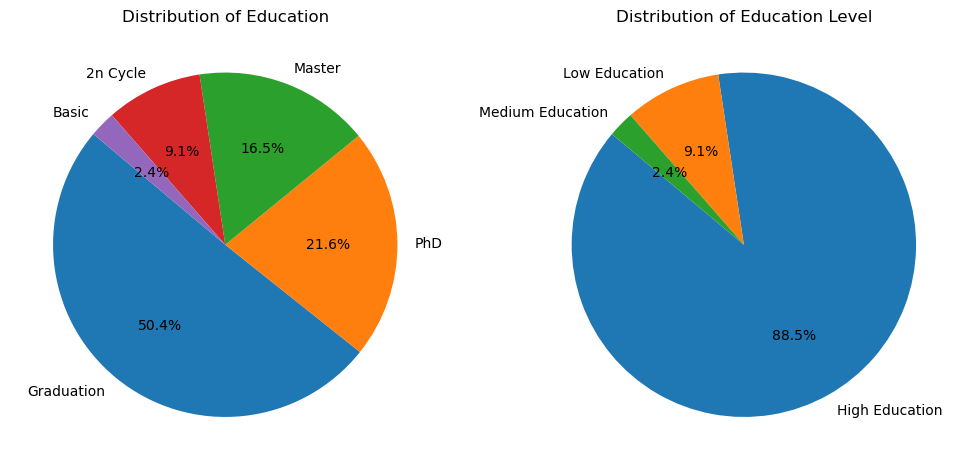

In [921]:
CateData = data[data.describe(include=['object']).columns]
CateDataplot = CateData.drop('Marital_Status',axis=1)



    
    # Create a figure with a grid of subplots
fig, axes = plt.subplots(1,3, figsize=(15, 15))
    
    # Flatten the axes array for easy iteration
axes = axes.flatten()
for i, column in enumerate(CateDataplot.columns):
        # Calculate the value counts of each category in the column
        counts = CateDataplot[column].value_counts()
        
        # Create a pie chart in the respective subplot
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'Distribution of {column}')
    
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()    


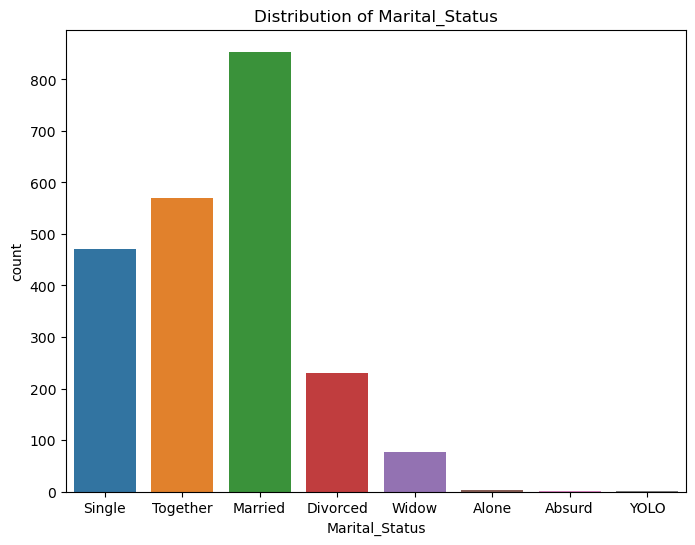

In [922]:
counts = data['Marital_Status'].value_counts()
        
        # Create a pie chart
plt.figure(figsize=(8, 6))
sns.countplot(x = data['Marital_Status']  )

plt.title(f'Distribution of Marital_Status')
plt.show()

In [923]:
CateData

,Education,Marital_Status,Education Level
0,Graduation,Single,High Education
1,Graduation,Single,High Education
2,Graduation,Together,High Education
3,Graduation,Together,High Education
4,PhD,Married,High Education
...,...,...,...
2235,Graduation,Married,High Education
2236,PhD,Together,High Education
2237,Graduation,Divorced,High Education
2238,Master,Together,High Education


the Ratios as a table 

In [924]:
Marital_Status = data[['Marital_Status']]
Marital_Status =round (Marital_Status.value_counts() /data.shape[0] *100,1)
Marital_Status = pd.DataFrame(data=Marital_Status , columns=['Ratio'])
Marital_Status

,Ratio
Marital_Status,
Married,38.7
Together,25.8
Single,21.3
Divorced,10.5
Widow,3.4
Alone,0.1
Absurd,0.1
YOLO,0.1


###  Correlation Analysis

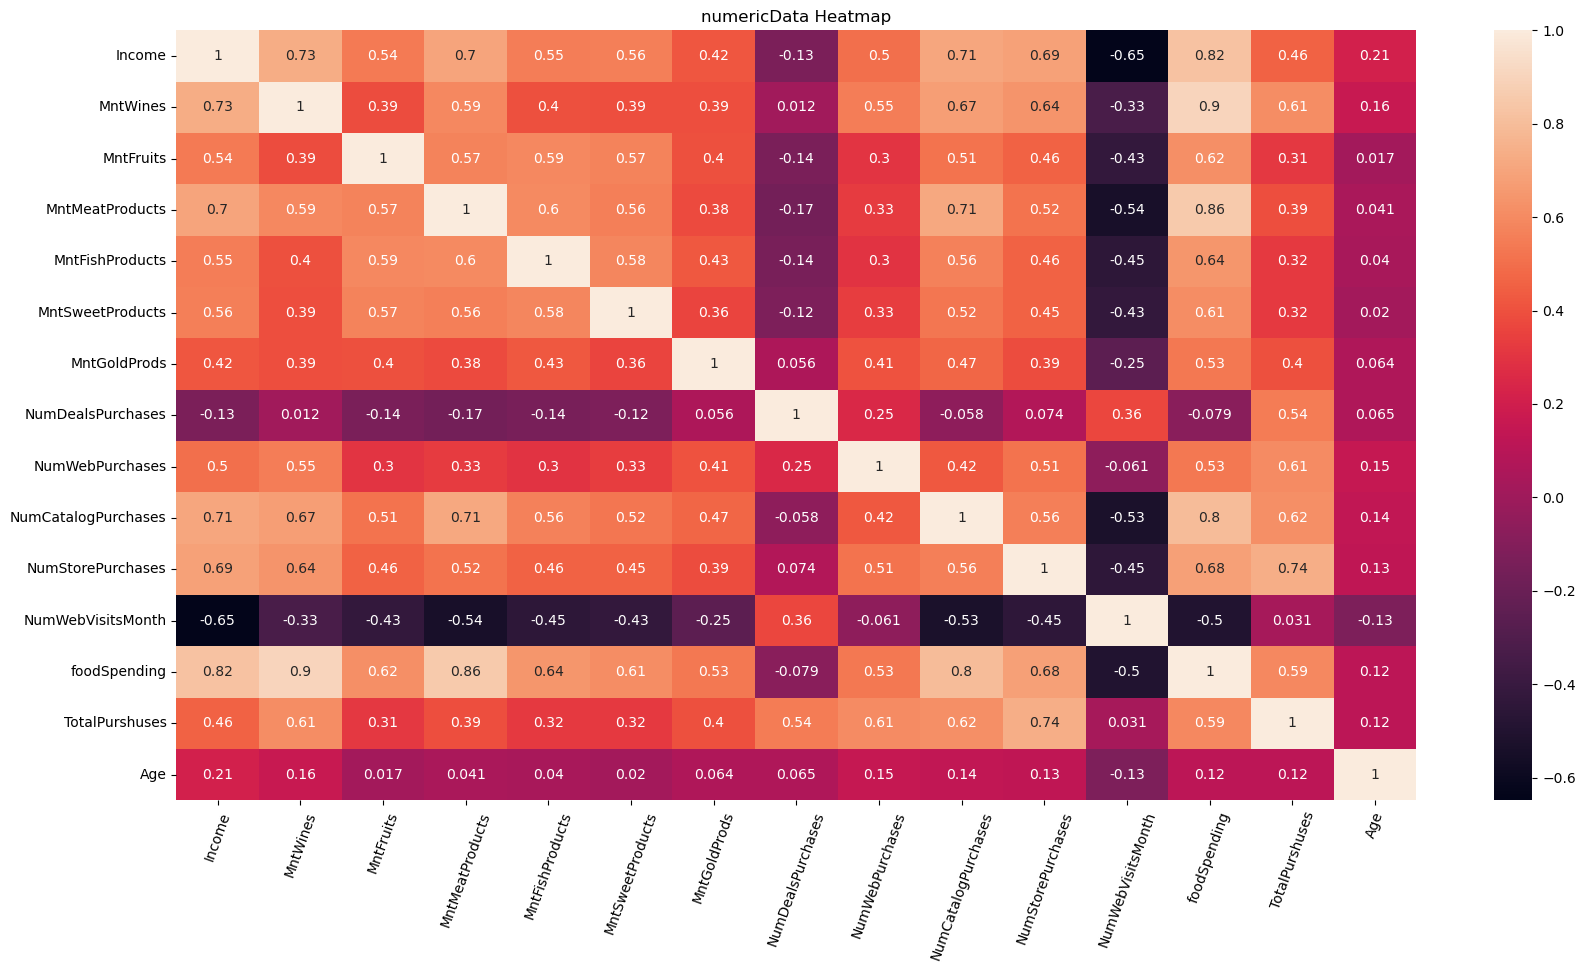

In [925]:
plt.figure(figsize=(20, 10))
sns.heatmap(numericData.corr(),annot=True  )
plt.title('numericData Heatmap')
plt.xticks(rotation=70)
plt.show()


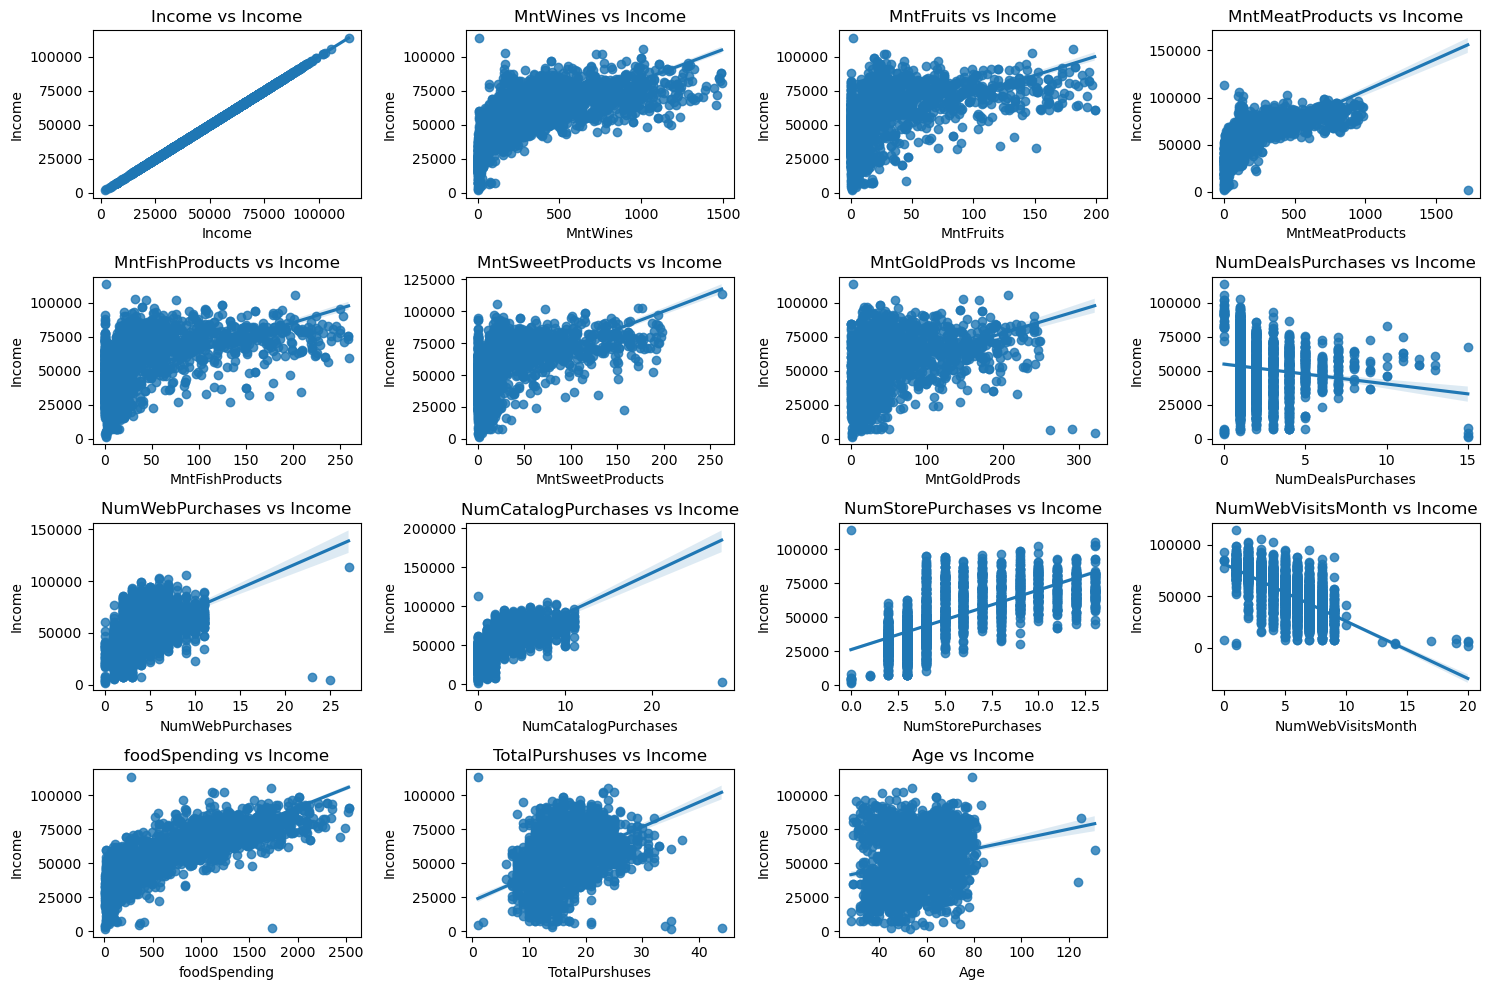

In [926]:
fig, axes = plt.subplots(4, 4, figsize=(15,  10))

axes = axes.flatten()

for idx, column in enumerate(numericData):
    sns.regplot(x=column, y='Income', data=data, ax=axes[idx])
    axes[idx].set_title(f'{column} vs Income')
    

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [927]:
CateData.describe()

,Education,Marital_Status,Education Level
count,2208,2208,2208
unique,5,8,3
top,Graduation,Married,High Education
freq,1113,854,1954


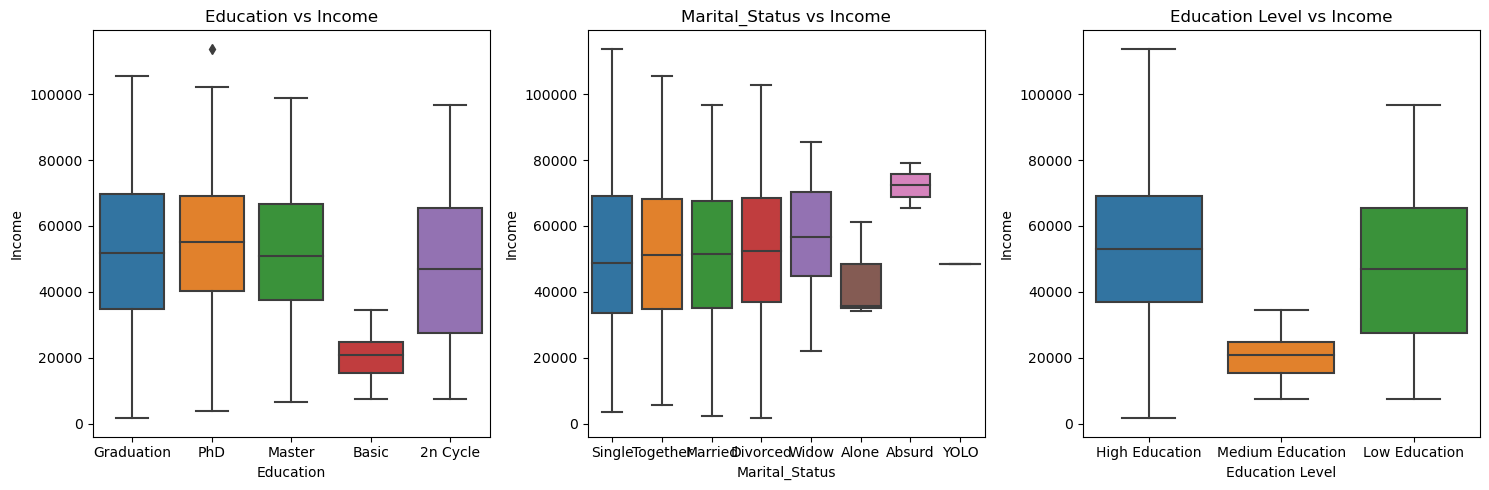

In [928]:
fig, axes = plt.subplots(1, 3, figsize=(15,  5))

axes = axes.flatten()

for idx, column in enumerate(CateData):
    sns.boxplot(x=column, y='Income', data=data, ax=axes[idx])
    axes[idx].set_title(f'{column} vs Income')
    

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### ANOVA test for Education Level

In [929]:
EducationLevelGroub = data[['Education Level','Income']].groupby(['Education Level'])
EducationLevelGroub.mean()

,Income
Education Level,
High Education,52908.852098
Low Education,47633.190000
Medium Education,20306.259259


In [930]:
f_val , p_val = stats.f_oneway(EducationLevelGroub.get_group('High Education')['Income']
                              ,EducationLevelGroub.get_group('Low Education')['Income']
                              ,EducationLevelGroub.get_group('Medium Education')['Income'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 73.75553807089648 , P = 9.86963137441307e-32


#### High Education and Low Education

In [931]:
f_val , p_val = stats.f_oneway(EducationLevelGroub.get_group('High Education')['Income']
                              ,EducationLevelGroub.get_group('Low Education')['Income']
                              )
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 12.272510786666542 , P = 0.00046906181909094866


#### High Education and Medium Education

In [932]:
f_val , p_val = stats.f_oneway(EducationLevelGroub.get_group('High Education')['Income']
                              ,EducationLevelGroub.get_group('Medium Education')['Income']
                              )
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 141.79873163280593 , P = 1.2196426102480188e-31


#### Medium Education and Low Education

In [933]:
f_val , p_val = stats.f_oneway(EducationLevelGroub.get_group('Low Education')['Income']
                              ,EducationLevelGroub.get_group('Medium Education')['Income'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 80.48039270093015 , P = 6.880101077310715e-17


In all three ANOVA results, the p-values are well below the typical threshold of 0.05, and the F-statistics are high. This means that for each of the tests, there is strong evidence to reject the null hypothesis that the means of the numeric target variable are equal across the different categories of the categorical variable. In other words, the categories of your categorical variable have a significant effect on the numeric target variable.

### Campaign Performance Analysis

In [934]:
Campaigns = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].columns
rate = {}
for col in Campaigns:
    ones = data[col].value_counts()[1]
    rate[col] = ones
rate = pd.Series(rate)
rate = pd.DataFrame (columns=list(rate.keys()) ,data = [rate.to_list()])
rate

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,142,30,163,164,162


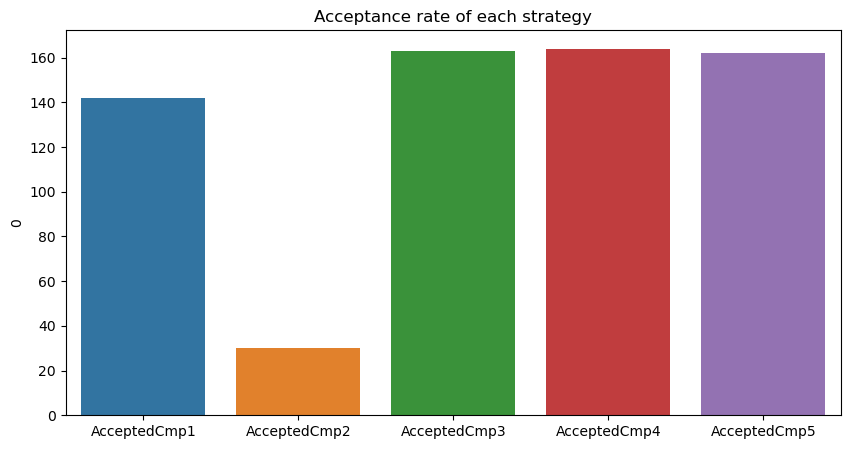

In [935]:
plt.figure(figsize=(10, 5))
sns.barplot(x = rate.columns , y = rate.iloc[0] ) ; 
plt.title("Acceptance rate of each strategy")

plt.show()

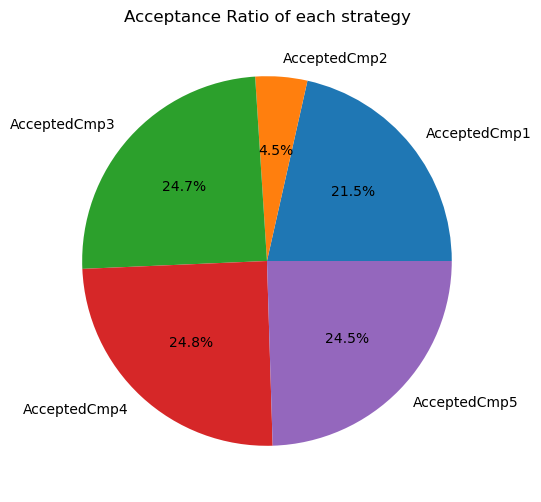

In [936]:
plt.figure(figsize=(6, 6))
plt.pie(labels= rate.columns , x = rate.iloc[0] , autopct='%1.1f%%');
plt.title("Acceptance Ratio of each strategy")
plt.show()

## Last camp analysis (Response)

In [937]:
Camp_Acceptores = data[(data['Response'] == 1)]

Text(0.5, 1.0, 'Respone distrbution')

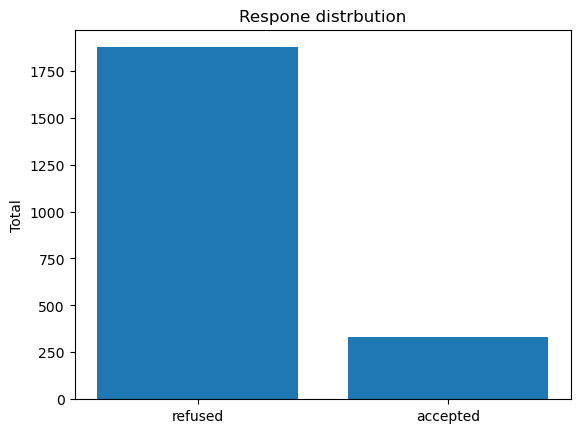

In [938]:
audiunce = [data['Response'].value_counts()]

audiunce = pd.DataFrame(audiunce)   
audiunce.columns = ['refused','accepted']
audiunce.rename(index={'Response' : 'total'} ,inplace=True)


plt.bar(x = audiunce.columns , height = audiunce.loc['total'],);
plt.ylabel('Total');
plt.title('Respone distrbution')

In [939]:
audiunce

,refused,accepted
total,1875,333


### Marital_Status for our Acceptors

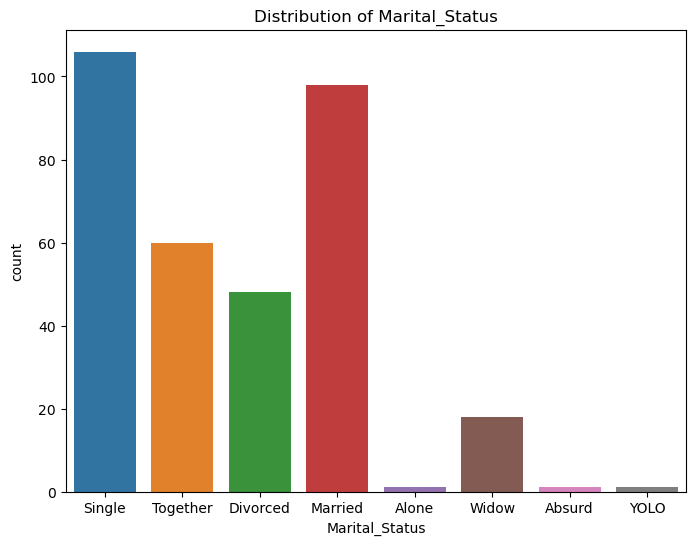

In [940]:


plt.figure(figsize=(8, 6))
sns.countplot(x=Camp_Acceptores['Marital_Status']);

plt.title(f'Distribution of Marital_Status')
plt.show()

In [941]:
Marital_StatusRatio = pd.DataFrame(round(Camp_Acceptores['Marital_Status'].value_counts()) )

Marital_StatusRatio.rename(columns={'Marital_Status': 'Count'},inplace=True)

Marital_StatusRatio

,Count
Single,106
Married,98
Together,60
Divorced,48
Widow,18
Alone,1
Absurd,1
YOLO,1


### Income mean for each statue

In [942]:
Marital_StatusIncome = Camp_Acceptores[['Marital_Status','Income']].groupby(['Marital_Status']).mean()
Marital_StatusIncome.rename(columns={'Income': 'Avg Income'},inplace=True)
Marital_StatusIncome['Avg Income'] = round(Marital_StatusIncome['Avg Income'],1)
Marital_StatusIncome

,Avg Income
Marital_Status,
Absurd,79244.0
Alone,35860.0
Divorced,61682.6
Married,60234.3
Single,60538.6
Together,58179.7
Widow,61927.6
YOLO,48432.0


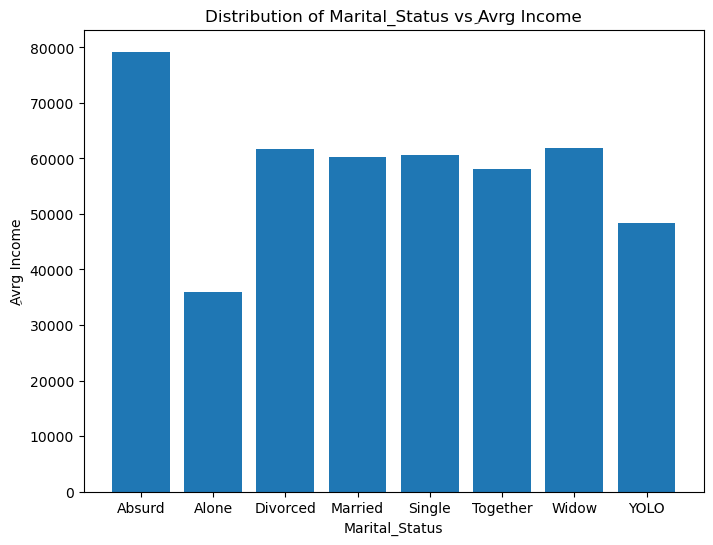

In [943]:
plt.figure(figsize=(8, 6))
plt.bar(x = Marital_StatusIncome.index , height=  Marital_StatusIncome['Avg Income'].values);

plt.title(f'Distribution of Marital_Status vsِ Avrg Income')
plt.xlabel('Marital_Status')
plt.ylabel('ِAvrg Income')
plt.show()

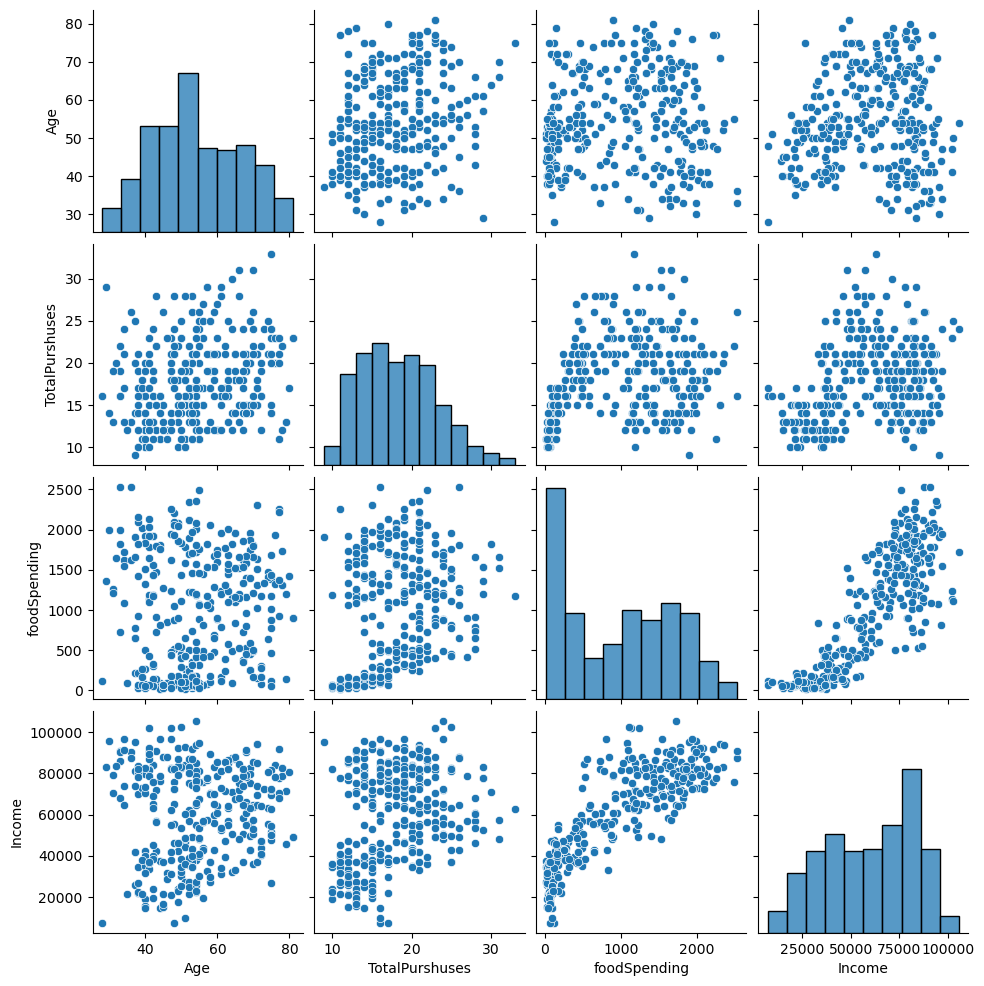

In [944]:
Camp_Acceptores = data[(data['Response'] == 1)]

sns.pairplot(Camp_Acceptores[['Age' , 'TotalPurshuses' ,'foodSpending','Income' ]]);

### Customer Segmentation based on Income



#### Income vs foodSpending

In [945]:
Ks = []
Income_foodSpending = Camp_Acceptores[['Income' , 'foodSpending']]
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(Income_foodSpending)
    iters = model.inertia_
    Ks.append(iters)


F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


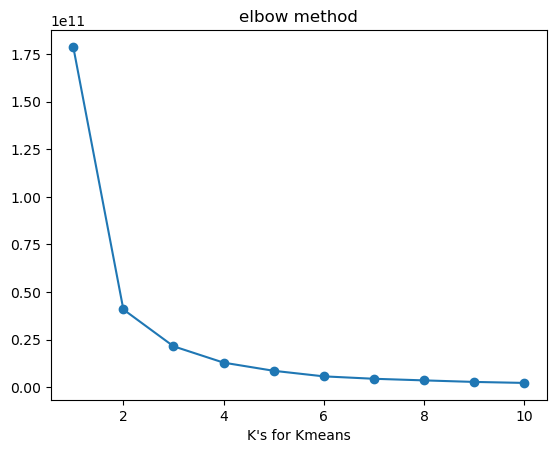

In [946]:
plt.plot([i for i in range(1,11)], Ks,marker = 'o' )
plt.xlabel('K\'s for Kmeans');
plt.title(f'elbow method');


- k = 3 

In [947]:
model  = KMeans(n_clusters=3)

identified_clusters1 = model.fit_predict(Income_foodSpending)

Income_foodSpending['cluster'] = identified_clusters1
Income_foodSpending = Income_foodSpending[['Income','foodSpending','cluster']]

C:\Users\mohamed\AppData\Local\Temp\ipykernel_18972\3838923308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Income_foodSpending['cluster'] = identified_clusters1


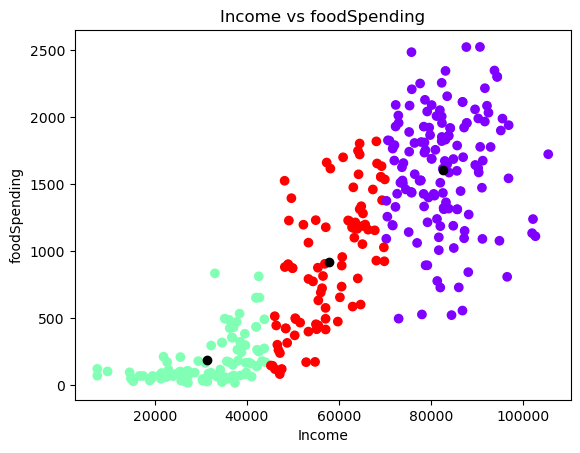

In [948]:
plt.scatter(Income_foodSpending['Income'],Income_foodSpending['foodSpending'],c=Income_foodSpending['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='black')
plt.xlabel('Income')
plt.ylabel('foodSpending')
plt.title(f'Income vs foodSpending');
plt.show()

## individuals who refused the camp analysis

In [949]:
Camp_Refusors = data[(data['Response'] == 0)]

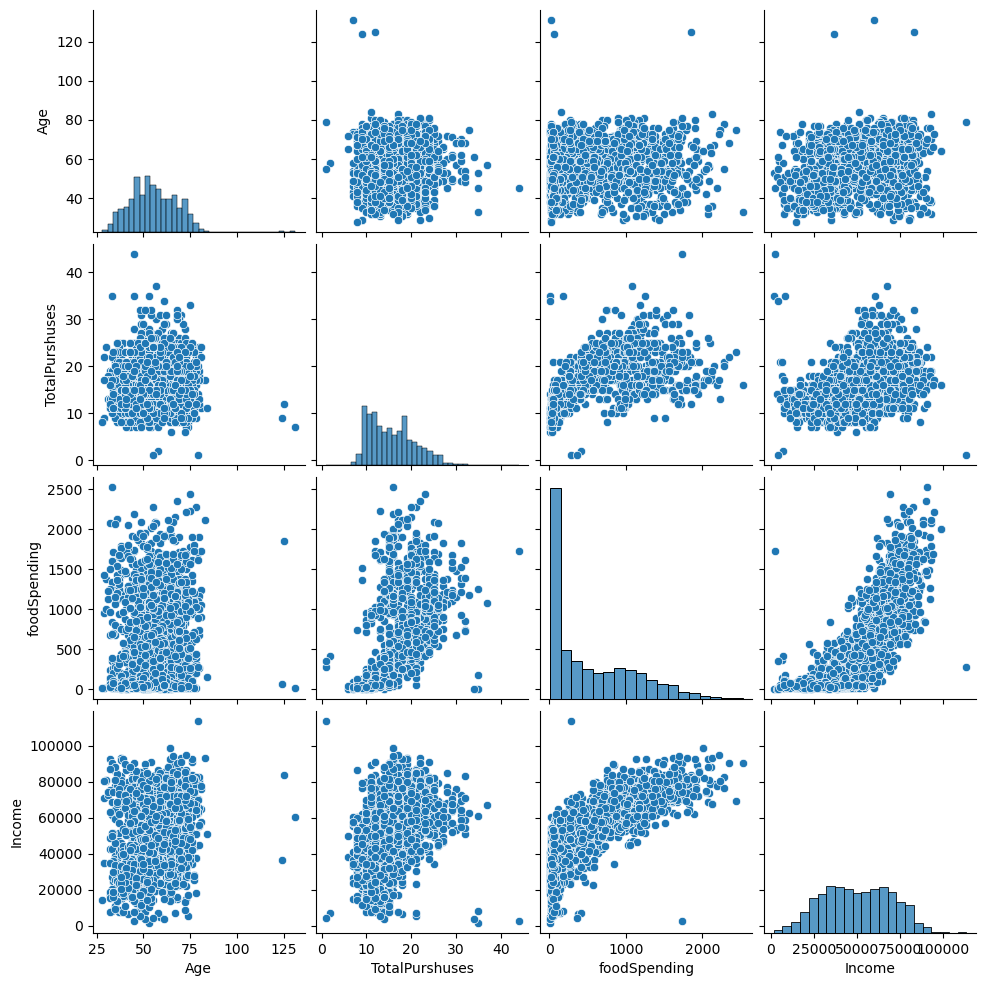

In [950]:
sns.pairplot(Camp_Refusors[['Age' , 'TotalPurshuses' ,'foodSpending','Income' ]])

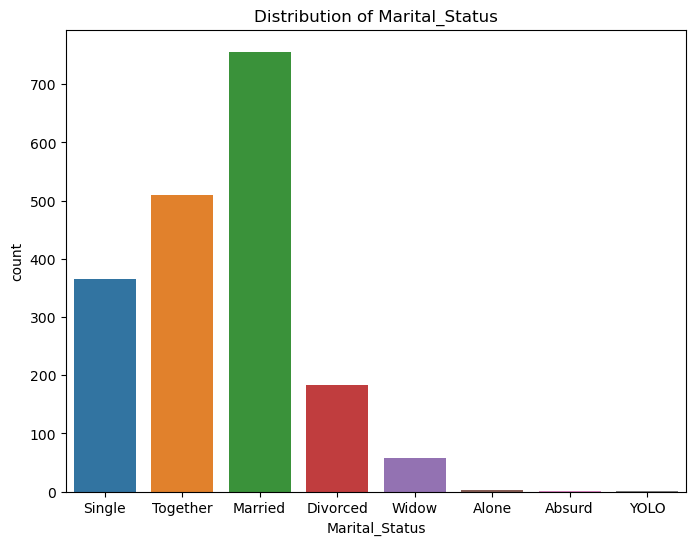

In [951]:
plt.figure(figsize=(8, 6))
sns.countplot(x=Camp_Refusors['Marital_Status']);

plt.title(f'Distribution of Marital_Status')
plt.show()

In [952]:
Marital_Status_Counts =  Camp_Refusors['Marital_Status'].value_counts().to_frame()
Marital_Status_Counts.rename_axis(index='Marital_Status', inplace=True)
Marital_Status_Counts.rename(columns={'Marital_Status':'Counts'}, inplace=True)
Marital_Status_Counts

,Counts
Marital_Status,
Married,756
Together,509
Single,365
Divorced,183
Widow,58
Alone,2
Absurd,1
YOLO,1


In [953]:
Marital_StatusIncome = Camp_Refusors[['Marital_Status','Income']].groupby(['Marital_Status']).mean()
Marital_StatusIncome.rename(columns={'Income': 'Avg Income'},inplace=True)
Marital_StatusIncome['Avg Income'] = round(Marital_StatusIncome['Avg Income'],1)
Marital_StatusIncome

,Avg Income
Marital_Status,
Absurd,65487.0
Alone,47753.5
Divorced,49961.0
Married,50198.9
Single,48223.9
Together,50834.9
Widow,54791.4
YOLO,48432.0


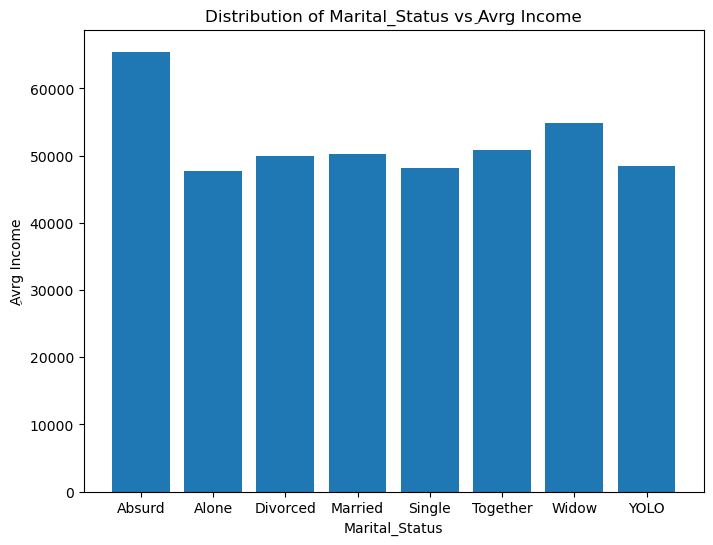

In [954]:
plt.figure(figsize=(8, 6))
plt.bar(x = Marital_StatusIncome.index , height=  Marital_StatusIncome['Avg Income'].values);

plt.title(f'Distribution of Marital_Status vsِ Avrg Income')
plt.xlabel('Marital_Status')
plt.ylabel('ِAvrg Income')
plt.show()

It appears that the majority of individuals who refused our campaign are married ,together and single. I will continue to analyze this groups further to understand the underlying reasons for their refusal.

### Married  People

In [955]:
MarriedRefData = Camp_Refusors[Camp_Refusors.Marital_Status == 'Married']
MarriedRefData = MarriedRefData['Education'].value_counts().to_frame()
MarriedRefData.rename_axis(index='Education', inplace=True)
MarriedRefData.rename(columns={'Education': 'Count'},inplace=True)
print(f'Married peaple who refused the camp :' , Camp_Refusors[Camp_Refusors.Marital_Status == 'Married'].shape[0])
print(f'-----------------------------------------')
print(f'count each Education statue')
print(f'---------------------------')
print(MarriedRefData)

Married peaple who refused the camp : 756
-----------------------------------------
count each Education statue
---------------------------
            Count
Education        
Graduation    386
PhD           155
Master        123
2n Cycle       72
Basic          20


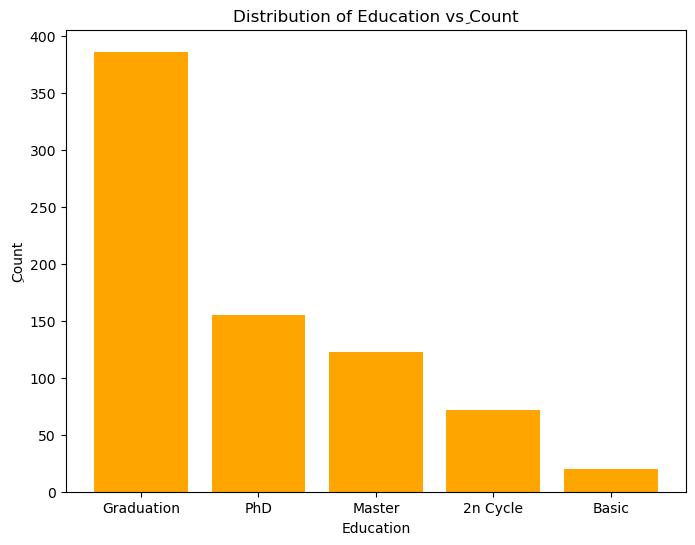

In [956]:
plt.figure(figsize=(8, 6))
plt.bar(x = MarriedRefData.index , height=  MarriedRefData['Count'].values,color ='Orange');

plt.title(f'Distribution of Education vsِ Count')
plt.xlabel('Education')
plt.ylabel('ِCount')
plt.show()

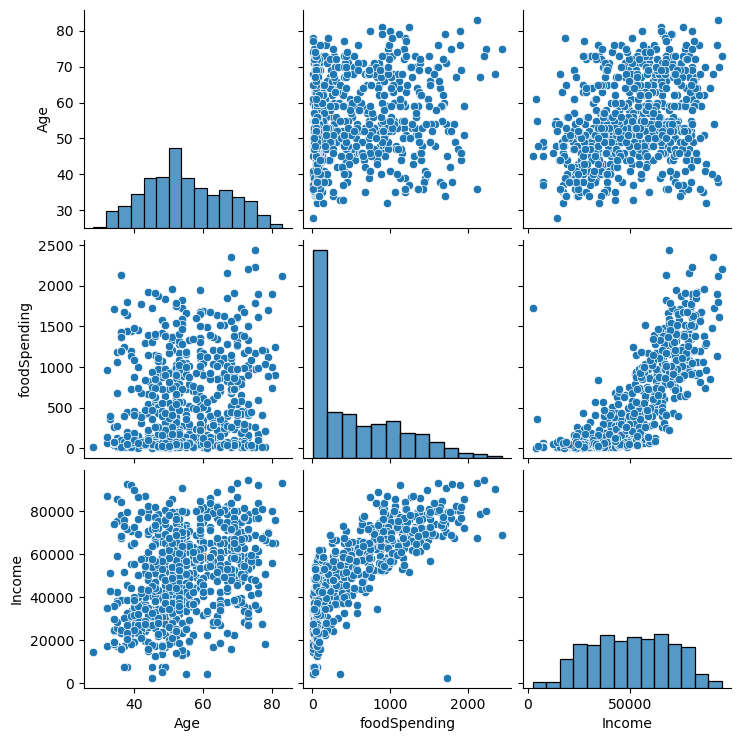

In [957]:
MarriedRefData = Camp_Refusors[Camp_Refusors.Marital_Status == 'Married']
sns.pairplot(MarriedRefData[['Age' , 'foodSpending','Income' ]])

## Customer Segmentation based on  Age and foodSpending

In [958]:
Ks = []
MarriedSegmentation = MarriedRefData[['Age' , 'foodSpending']]
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(MarriedSegmentation)
    iters = model.inertia_
    Ks.append(iters)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


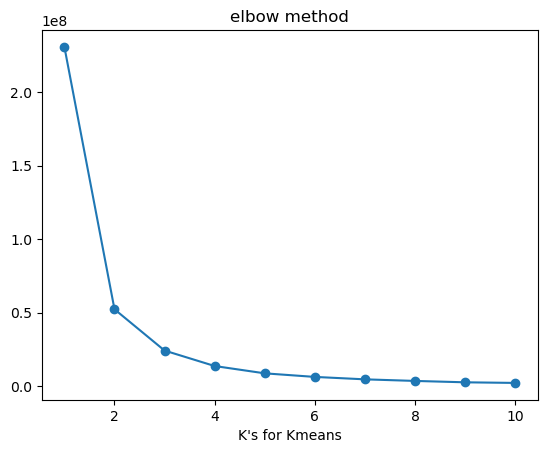

In [959]:
plt.plot([i for i in range(1,11)], Ks,marker = 'o' )
plt.xlabel('K\'s for Kmeans');
plt.title(f'elbow method');

In [960]:
model  = KMeans(n_clusters=3)

identified_clusters1 = model.fit_predict(MarriedSegmentation)

MarriedSegmentation['cluster'] = identified_clusters1
MarriedSegmentation = MarriedSegmentation[['Age','foodSpending','cluster']]

C:\Users\mohamed\AppData\Local\Temp\ipykernel_18972\3525588864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MarriedSegmentation['cluster'] = identified_clusters1


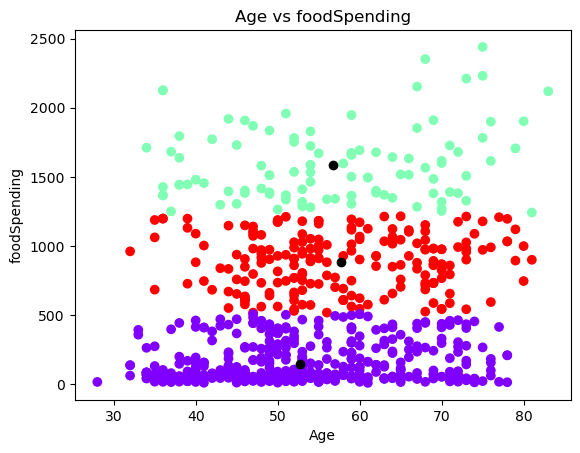

In [961]:
plt.scatter(MarriedSegmentation['Age'],MarriedSegmentation['foodSpending'],c=MarriedSegmentation['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='black')
plt.xlabel('Age')
plt.ylabel('foodSpending')
plt.title(f'Age vs foodSpending');
plt.show()

## Customer Segmentation based on  Age and Income

In [962]:
Ks = []
MarriedSegmentation2 = MarriedRefData[['Age' , 'Income']]
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(MarriedSegmentation2)
    iters = model.inertia_
    Ks.append(iters)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


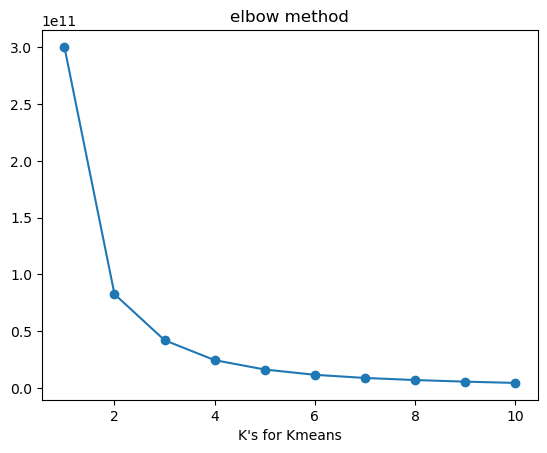

In [963]:
plt.plot([i for i in range(1,11)], Ks,marker = 'o' )
plt.xlabel('K\'s for Kmeans');
plt.title(f'elbow method');

In [964]:
model  = KMeans(n_clusters=3)

identified_clusters1 = model.fit_predict(MarriedSegmentation2)

MarriedSegmentation2['cluster'] = identified_clusters1
MarriedSegmentation2 = MarriedSegmentation2[['Age','Income','cluster']]

C:\Users\mohamed\AppData\Local\Temp\ipykernel_18972\3225528144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MarriedSegmentation2['cluster'] = identified_clusters1


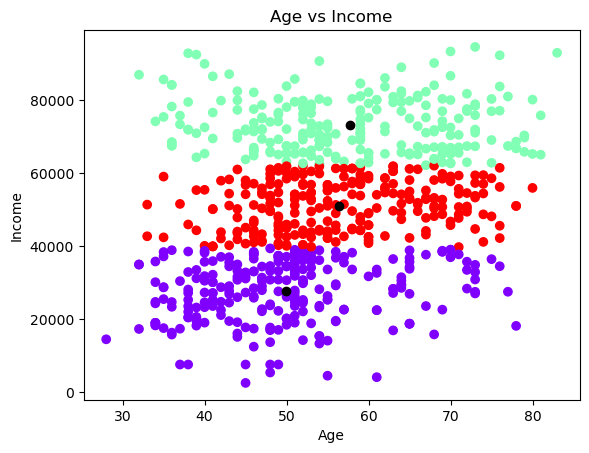

In [965]:
plt.scatter(MarriedSegmentation2['Age'],MarriedSegmentation2['Income'],c=MarriedSegmentation2['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title(f'Age vs Income');
plt.show()

### Together People

In [966]:
TogetherRefData = Camp_Refusors[Camp_Refusors.Marital_Status == 'Together']
TogetherRefData = TogetherRefData['Education'].value_counts().to_frame()
TogetherRefData.rename_axis(index='Education', inplace=True)
TogetherRefData.rename(columns={'Education': 'Count'},inplace=True)
print(f'Together peaple who refused the camp :' , Camp_Refusors[Camp_Refusors.Marital_Status == 'Together'].shape[0])
print(f'-----------------------------------------')
print(f'count each Education statue')
print(f'---------------------------')
print(TogetherRefData)

Together peaple who refused the camp : 509
-----------------------------------------
count each Education statue
---------------------------
            Count
Education        
Graduation    252
PhD           103
Master         89
2n Cycle       53
Basic          12


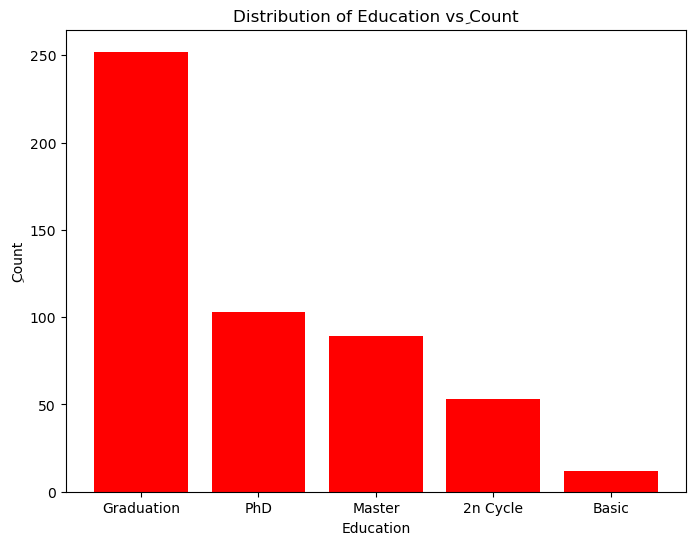

In [967]:
plt.figure(figsize=(8, 6))
plt.bar(x = TogetherRefData.index , height=  TogetherRefData['Count'].values,color ='red');

plt.title(f'Distribution of Education vsِ Count')
plt.xlabel('Education')
plt.ylabel('ِCount')
plt.show()

In [968]:
TogetherRefData = Camp_Refusors[Camp_Refusors.Marital_Status == 'Together']

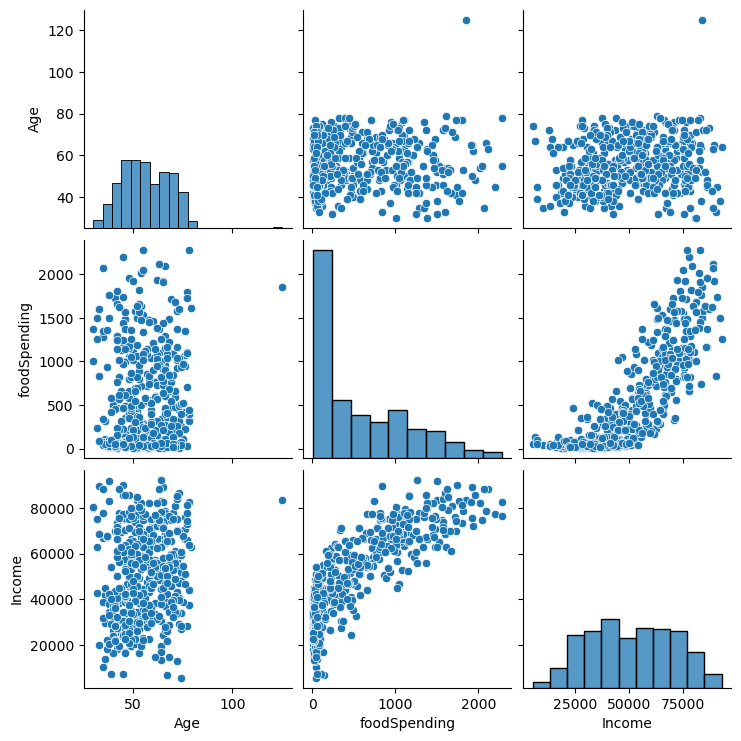

In [969]:

sns.pairplot(TogetherRefData[['Age' , 'foodSpending','Income' ]])

## Customer Segmentation based on  Age and foodspending

In [970]:
Ks = []
TogetherSegmentation = TogetherRefData[['Age' , 'foodSpending']]
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(TogetherSegmentation)
    iters = model.inertia_
    Ks.append(iters)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


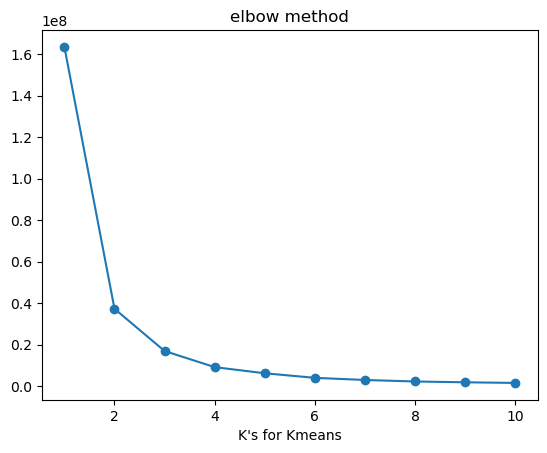

In [971]:
plt.plot([i for i in range(1,11)], Ks,marker = 'o' )
plt.xlabel('K\'s for Kmeans');
plt.title(f'elbow method');

In [972]:
model  = KMeans(n_clusters=3)

identified_clusters1 = model.fit_predict(TogetherSegmentation)

TogetherSegmentation['cluster'] = identified_clusters1
TogetherSegmentation = TogetherSegmentation[['Age','foodSpending','cluster']]

C:\Users\mohamed\AppData\Local\Temp\ipykernel_18972\3719280072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TogetherSegmentation['cluster'] = identified_clusters1


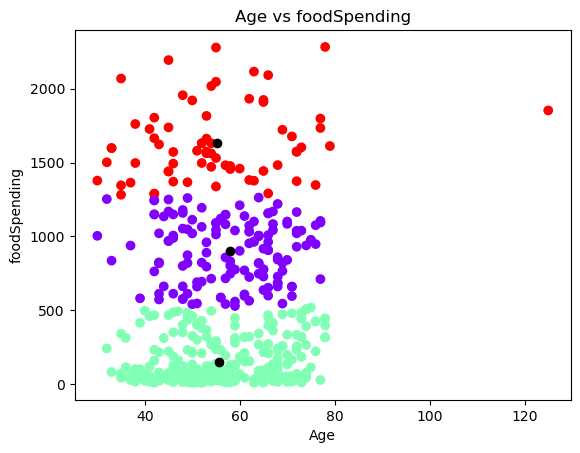

In [973]:
plt.scatter(TogetherSegmentation['Age'],TogetherSegmentation['foodSpending'],c=TogetherSegmentation['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='black')
plt.xlabel('Age')
plt.ylabel('foodSpending')
plt.title(f'Age vs foodSpending');
plt.show()

### Sinlge People

In [974]:
SingleRefData = Camp_Refusors[Camp_Refusors.Marital_Status == 'Single']
SingleRefData = SingleRefData['Education'].value_counts().to_frame()
SingleRefData.rename_axis(index='Education', inplace=True)
SingleRefData.rename(columns={'Education': 'Count'},inplace=True)
print(f'Single peaple who refused the camp :' , Camp_Refusors[Camp_Refusors.Marital_Status == 'Single'].shape[0])
print(f'-----------------------------------------')
print(f'count each Education statue')
print(f'---------------------------')
print(SingleRefData)

Single peaple who refused the camp : 365
-----------------------------------------
count each Education statue
---------------------------
            Count
Education        
Graduation    194
PhD            66
Master         57
2n Cycle       30
Basic          18


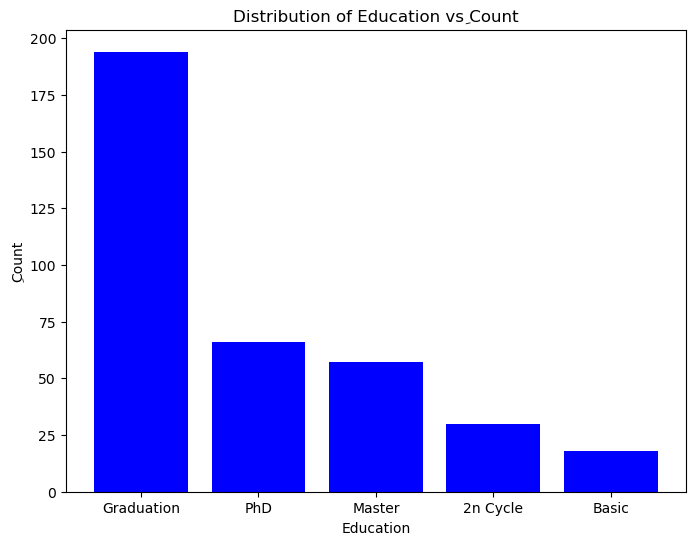

In [975]:
plt.figure(figsize=(8, 6))
plt.bar(x = SingleRefData.index , height=  SingleRefData['Count'].values,color ='blue');

plt.title(f'Distribution of Education vsِ Count')
plt.xlabel('Education')
plt.ylabel('ِCount')
plt.show()

In [976]:
SingleRefData

,Count
Education,
Graduation,194
PhD,66
Master,57
2n Cycle,30
Basic,18


In [978]:
SingleRefData = Camp_Refusors[Camp_Refusors.Marital_Status == 'Single']

## Customer Segmentation based on  Age and foodspending

In [979]:
Ks = []
singleSegmentation = SingleRefData[['Age' , 'Income']]
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(singleSegmentation)
    iters = model.inertia_
    Ks.append(iters)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


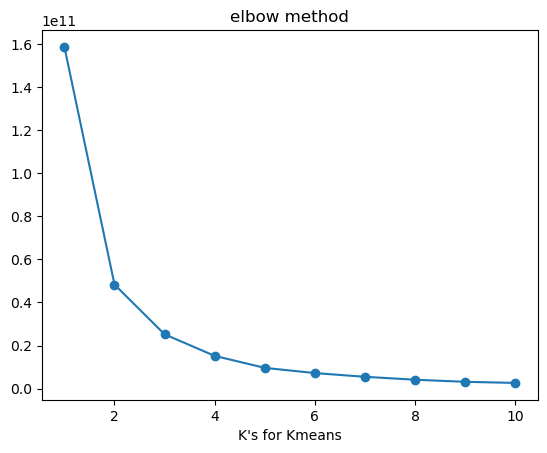

In [980]:
plt.plot([i for i in range(1,11)], Ks,marker = 'o' )
plt.xlabel('K\'s for Kmeans');
plt.title(f'elbow method');

In [981]:
model  = KMeans(n_clusters=3)

identified_clusters = model.fit_predict(singleSegmentation)

singleSegmentation['cluster'] = identified_clusters
singleSegmentation = singleSegmentation[['Age','Income','cluster']]

C:\Users\mohamed\AppData\Local\Temp\ipykernel_18972\1372757139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  singleSegmentation['cluster'] = identified_clusters


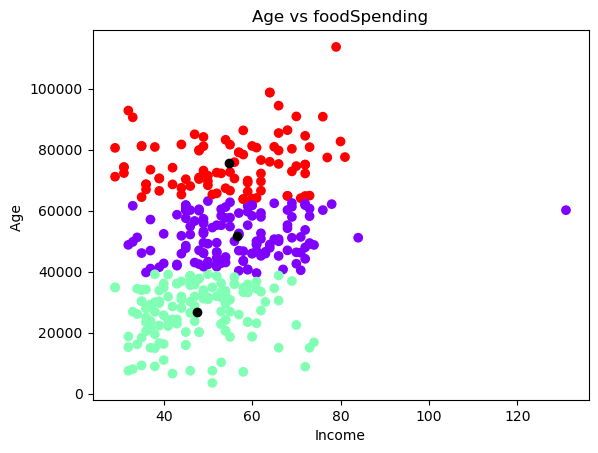

In [982]:
plt.scatter(singleSegmentation['Age'],singleSegmentation['Income'],c=singleSegmentation['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color ='black')
plt.xlabel('Income')
plt.ylabel('Age ')
plt.title(f'Age vs foodSpending');
plt.show()

# Data Preparation for modeling

In [983]:
X = data.drop('Response' ,axis=1)
y= data['Response']

In [984]:
# Encode categorical variables
label_encoder = LabelEncoder()

In [985]:
CateData.columns

Index(['Education', 'Marital_Status', 'Education Level'], dtype='object')

In [986]:
X['Education'] = label_encoder.fit_transform(y =data['Education'])
X['Marital_Status'] = label_encoder.fit_transform(y =data['Marital_Status'])
X['Education Level'] = label_encoder.fit_transform(y =data['Education Level'])

In [987]:
X.dtypes

Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
foodSpending             int64
TotalPurshuses           int64
TotalAcceptedCamps       int64
Age                      int64
Education Level          int32
Is_Parent                int32
dtype: object

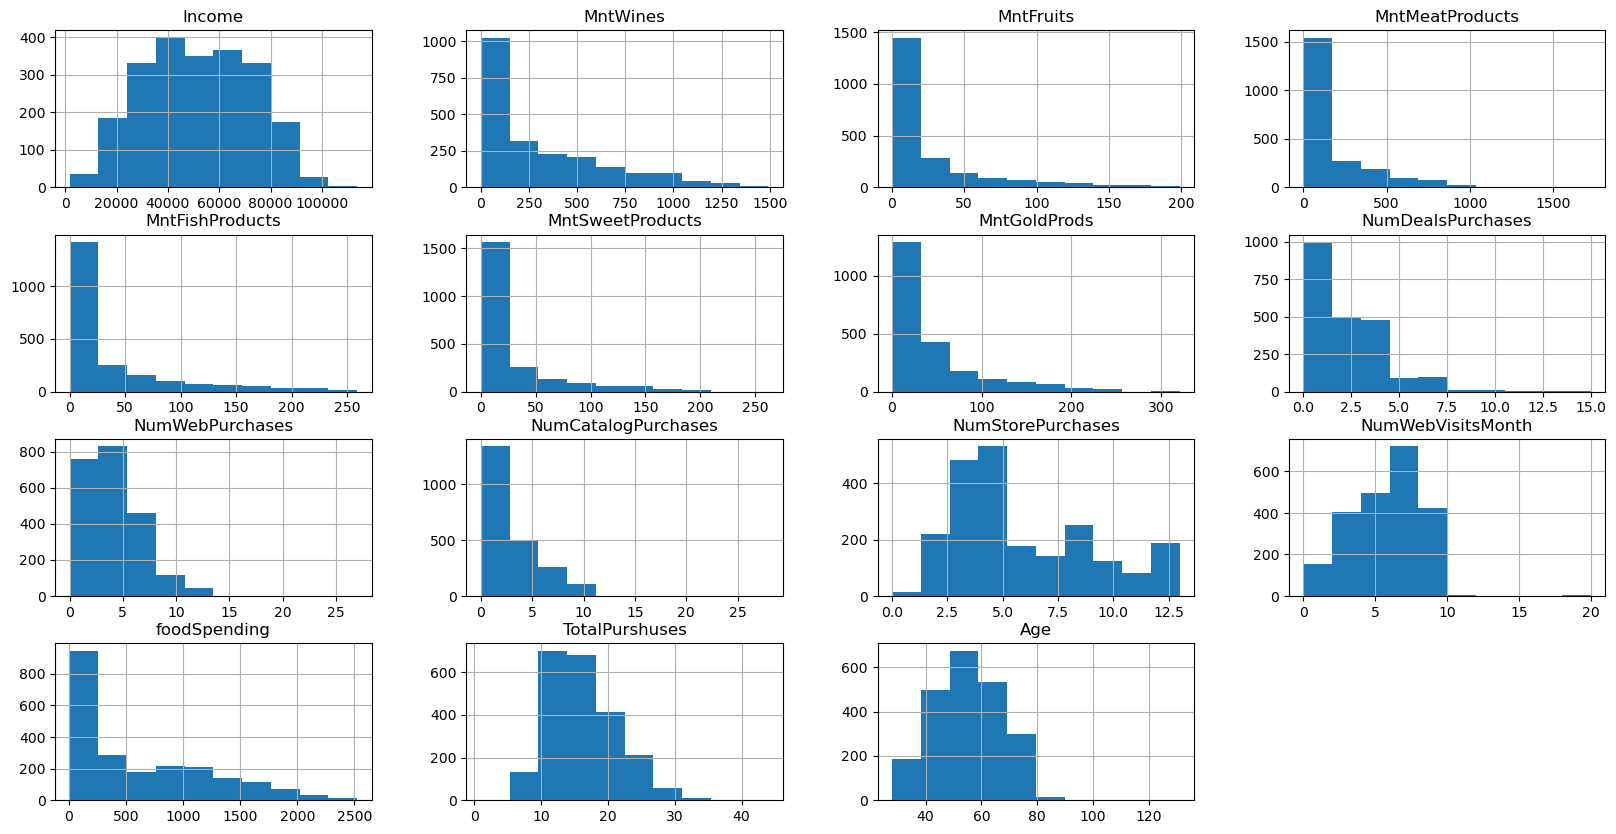

In [988]:
numericData.hist(figsize=(20,10));

#### dealing with skewness

In [989]:
X['MntWines'] = np.log1p(X['MntWines'])
X['MntFruits'] = np.log1p(X['MntFruits'])
X['MntMeatProducts'] = np.log1p(X['MntMeatProducts'])
X['MntFishProducts'] = np.log1p(X['MntFishProducts'])
X['MntSweetProducts'] = np.log1p(X['MntSweetProducts'])
X['MntGoldProds'] = np.log1p(X['MntGoldProds'])
X['NumDealsPurchases'] = np.log1p(X['NumDealsPurchases'])
X['NumWebPurchases'] = np.log1p(X['NumWebPurchases'])
X['NumCatalogPurchases'] = np.log1p(X['NumCatalogPurchases'])
X['foodSpending'] = np.log1p(X['foodSpending'])

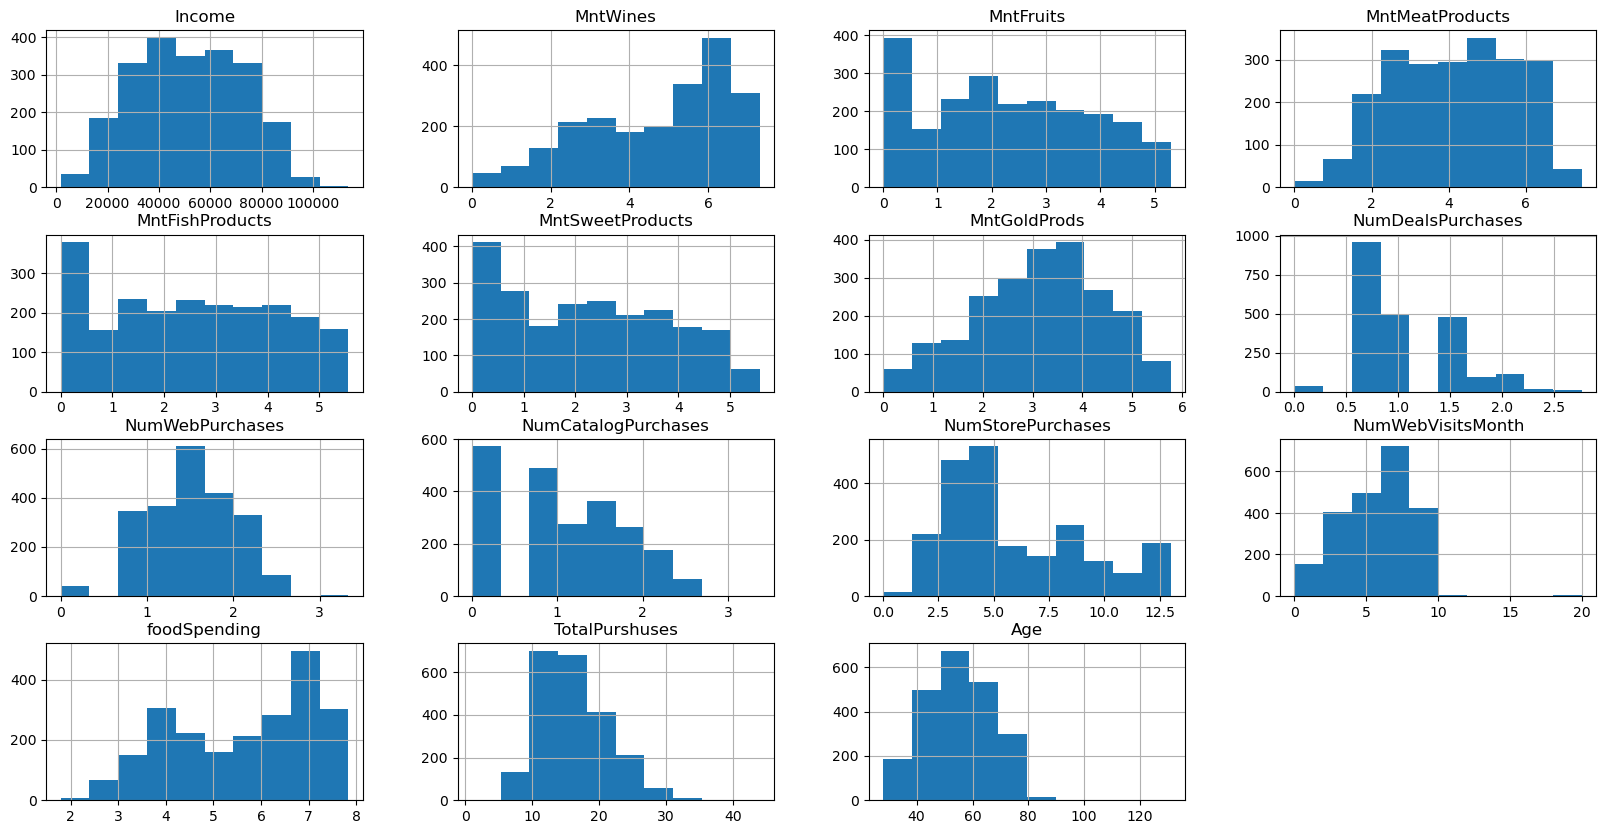

In [990]:
X[numericData.columns].hist(figsize=(20,10));

# Predictive Modeling

### Modeling Preparation

In [991]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#### data scaling

In [992]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Evaluation

In [999]:
LogisticRegression = LogisticRegression()
RandomForestClassifier =RandomForestClassifier()

In [1011]:
models = [LogisticRegression  , RandomForestClassifier]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Evaluation
    print(f"--------------------------------------------------------")
    print(f"{model} Performance:")
    print(f"--------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print(f"------------------------------")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"------------------------------")
    print(f"                                         ")
    print(f"                                         ")

--------------------------------------------------------
LogisticRegression() Performance:
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       621
           1       0.62      0.33      0.43       108

    accuracy                           0.87       729
   macro avg       0.76      0.65      0.68       729
weighted avg       0.85      0.87      0.85       729

------------------------------
Accuracy: 0.8710562414266118
------------------------------
                                         
                                         
--------------------------------------------------------
RandomForestClassifier() Performance:
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       621
           1       0.62      0.34      0.44       108

    accuracy                      

### Repeated k-Fold Cross-Validation

In [1014]:
for model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f'Accuracy for {model} : %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy for LogisticRegression() : 85.537 (0.982)
Accuracy for RandomForestClassifier() : 87.454 (1.094)
